In [2]:


%load_ext autoreload
%autoreload 2
%matplotlib inline
import torch 
import numpy as np
from PIL import Image
from torchvision import transforms
import pandas as pd 
import json 
import copy 
import pickle 
import os 
import sys
import copy
import umap
import wandb
from pytorch_lightning.loggers import WandbLogger

import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path.append('../py_scripts')
from py_scripts import LightningDataModule, get_params_net_dataloader
import glob
import pickle
import torch.nn.functional as F
from diffusion_utils import *

# DONT NEED TO USE GPU HERE

use_gpu = False

if use_gpu: 
    os.environ["CUDA_VISIBLE_DEVICES"] = "1"

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else: 
    device="cpu"



In [3]:
#!ls ../../scratch_link/Foundational-SDM/wandb_Logger/

Noise amount: 0.0
Checkpoints found ['../../scratch_link/Foundational-SDM/wandb_Logger/0.0Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=929-step=45570.ckpt']
Load from checkpoint ../../scratch_link/Foundational-SDM/wandb_Logger/0.0Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=929-step=45570.ckpt /home/tbricken/SDM-Diffusion/notebooks
activity threshold is: 0.0
SDM_DIFFUSION(
  (sdm_module): SDMBase(
    (net): Sequential(
      (0): TrackedMLPLayer(
        (act_func): ReLU()
        (layer): Linear(in_features=3072, out_features=10000, bias=False)
      )
      (1): ReLU()
      (2): Linear(in_features=10000, out_features=3072, bias=False)
    )
    (X_a): Linear(in_features=3072, out_features=10000, bias=False)
    (top_k): ReLU()
    (X_vT): Linear(in_features=10000, out_features=3072, bias=False)
  )
  (net): Sequential(
    (0): NoiseLayer()
    (1): Sequential(
    

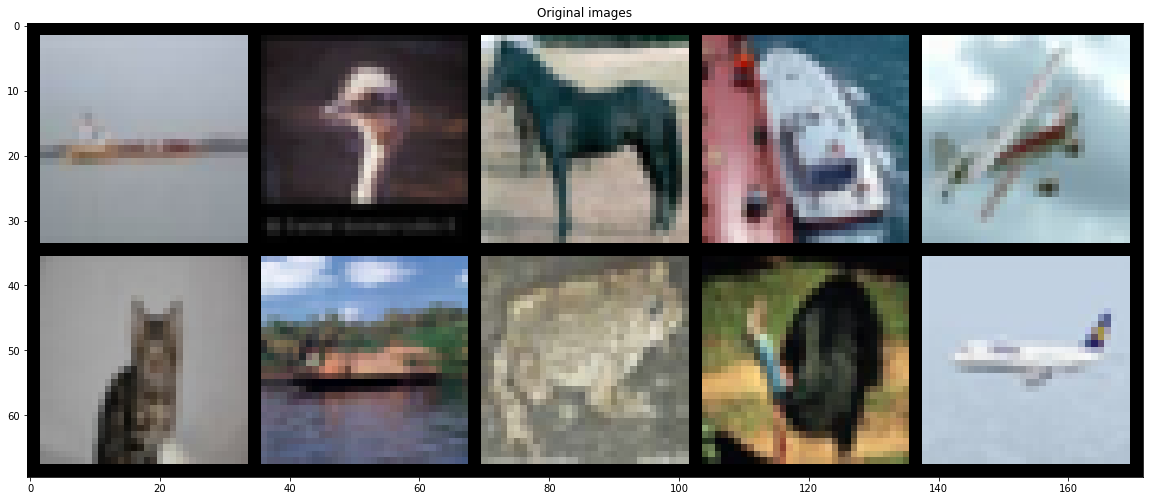

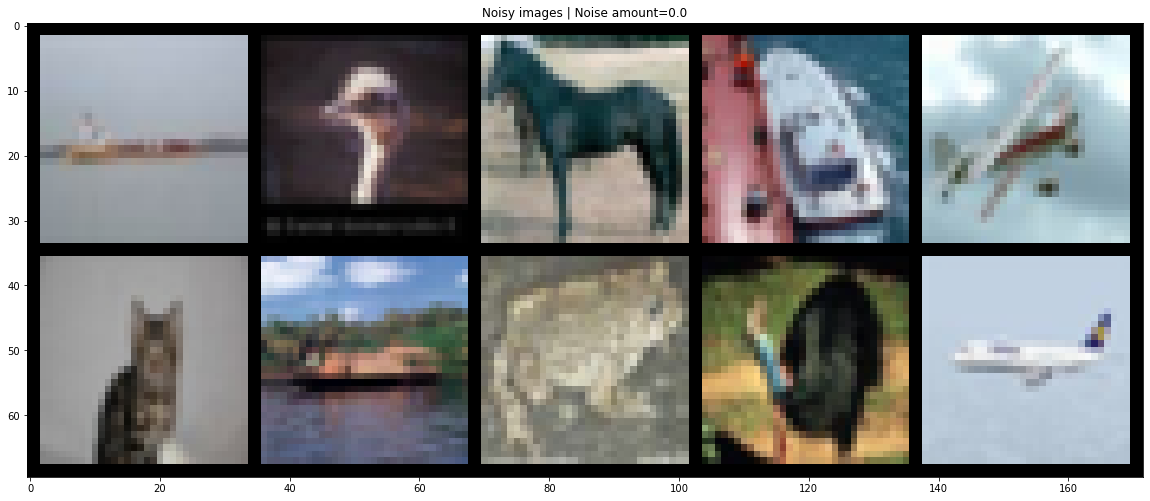

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


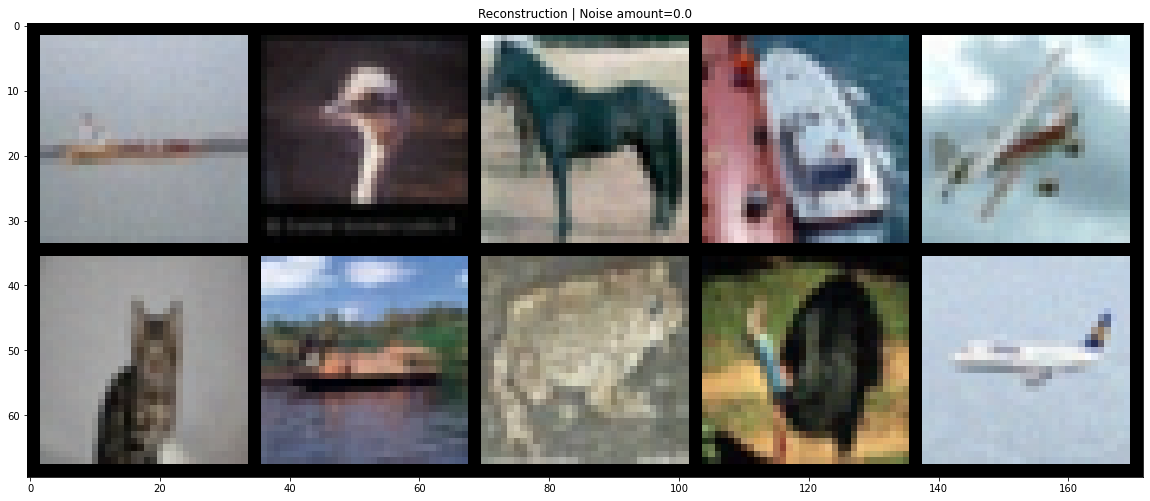

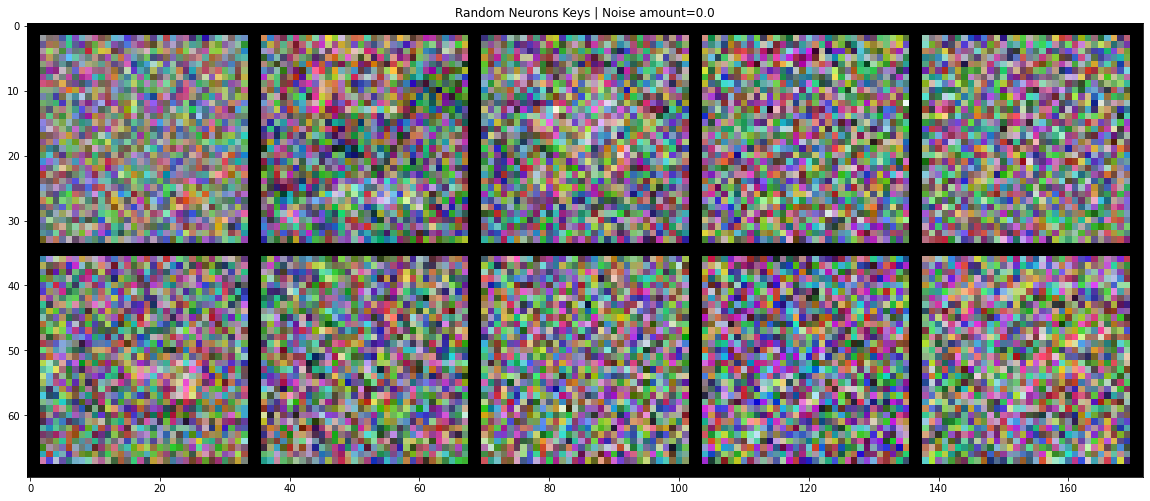

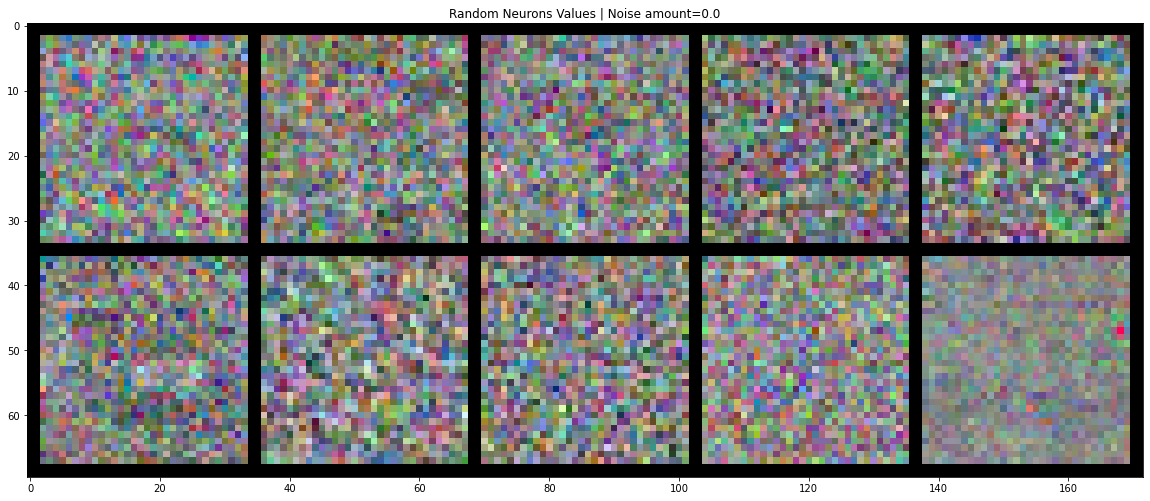

Batch 0
Fraction of alive neurons tensor(0.9028)


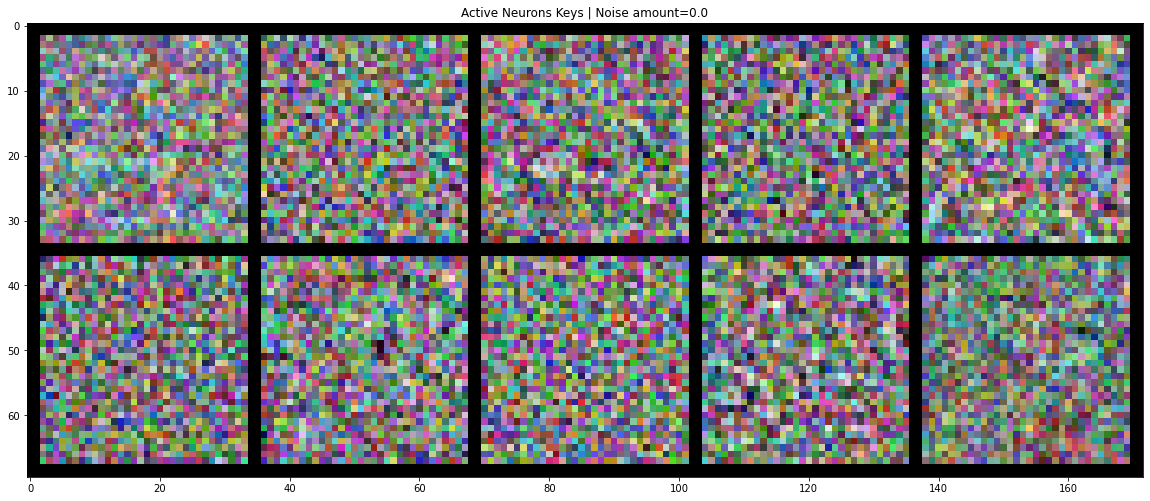

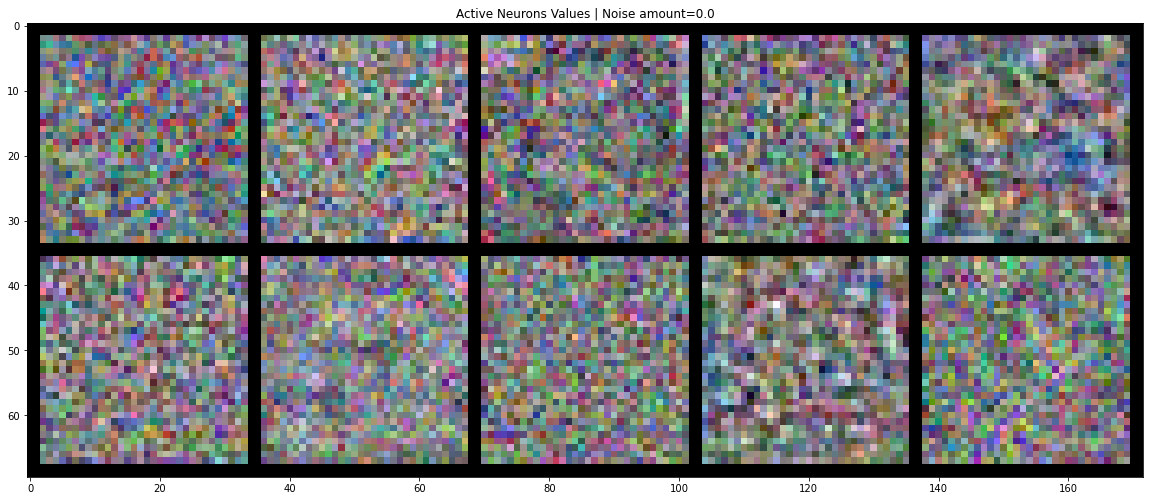

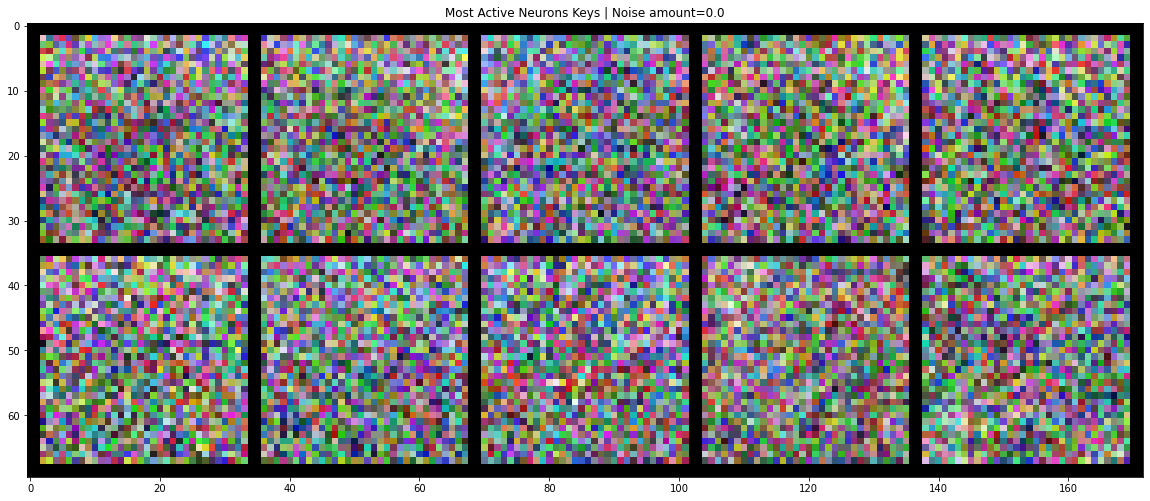

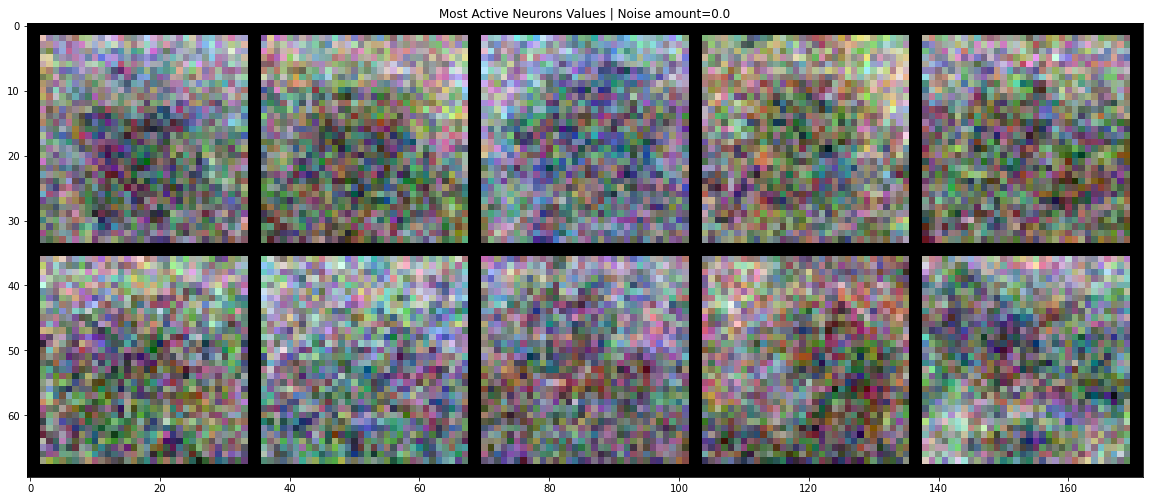

Mean cosine similarity tensor(0.3422)
Activity weighted mean cosine similarity tensor(0.6721)


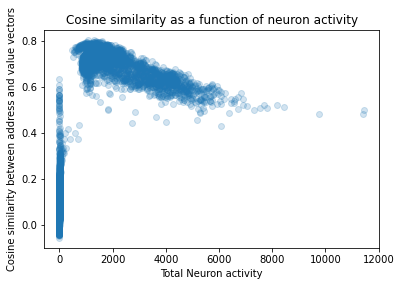

Noise amount: 0.05
Checkpoints found ['../../scratch_link/Foundational-SDM/wandb_Logger/0.05Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=939-step=46060.ckpt']
Load from checkpoint ../../scratch_link/Foundational-SDM/wandb_Logger/0.05Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=939-step=46060.ckpt /home/tbricken/SDM-Diffusion/notebooks
activity threshold is: 0.0


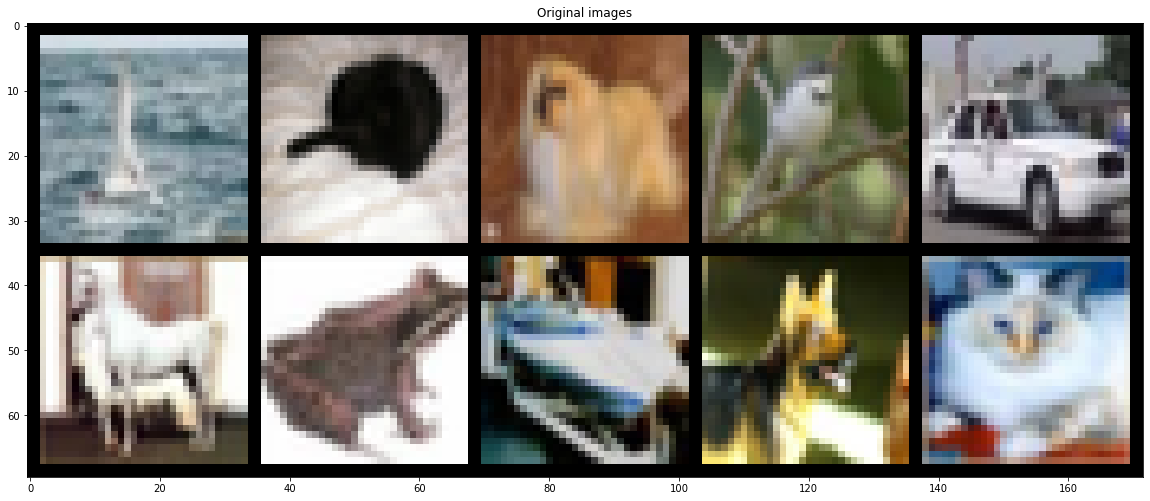

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


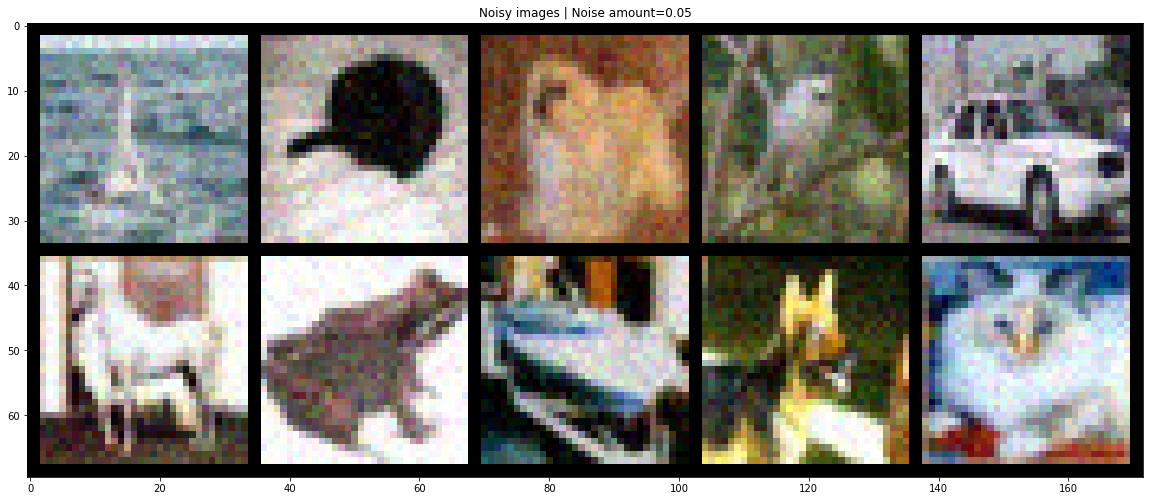

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


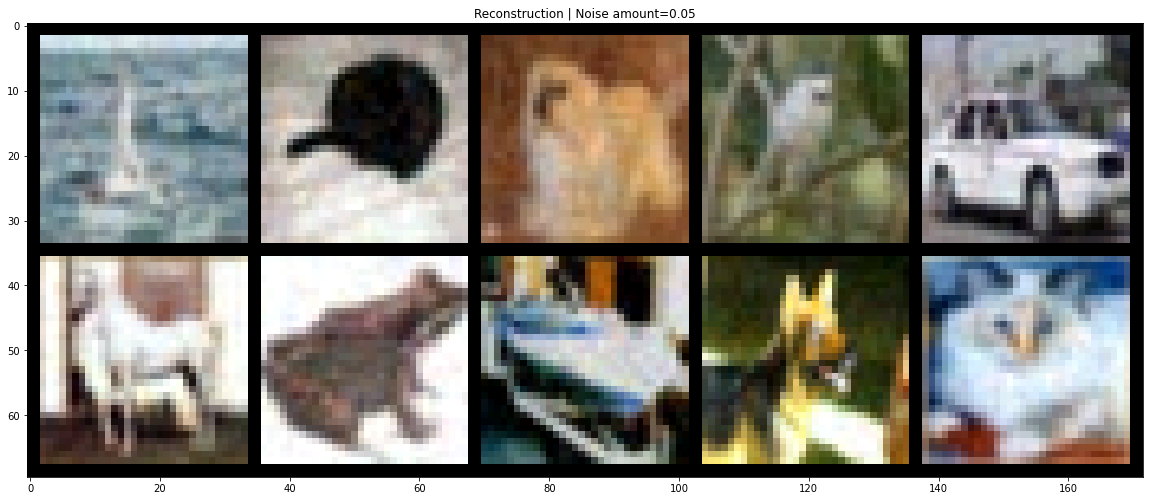

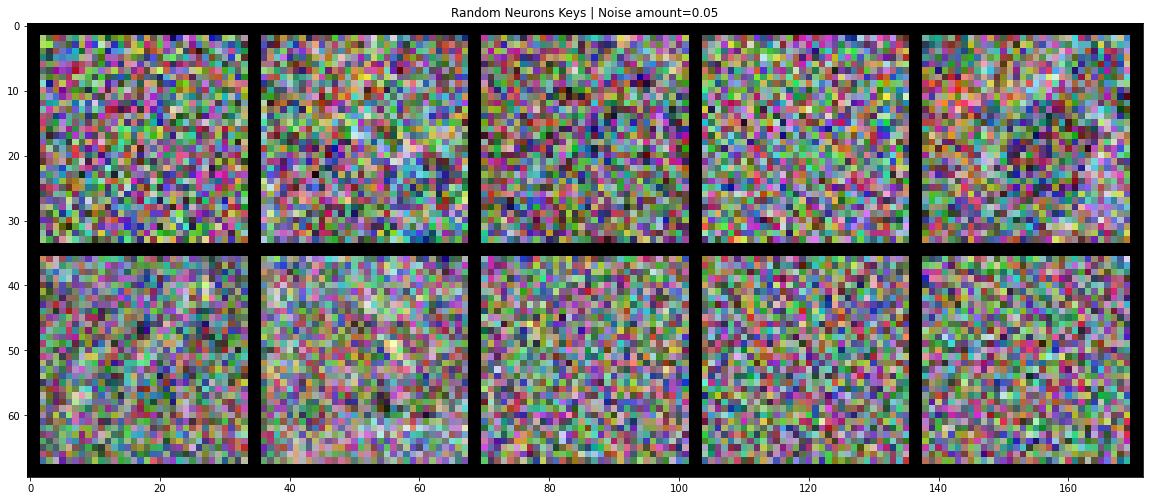

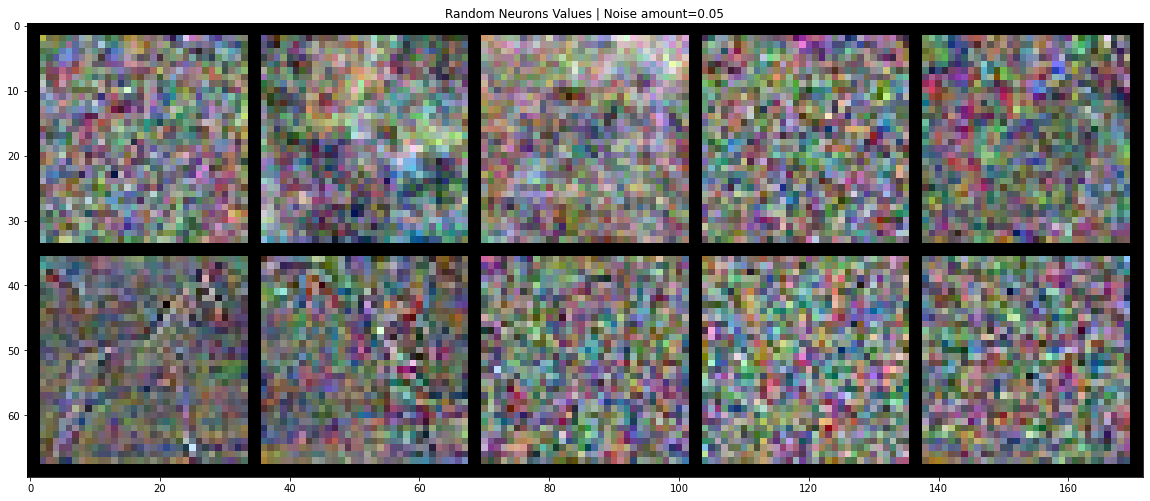

Batch 0
Fraction of alive neurons tensor(0.8509)


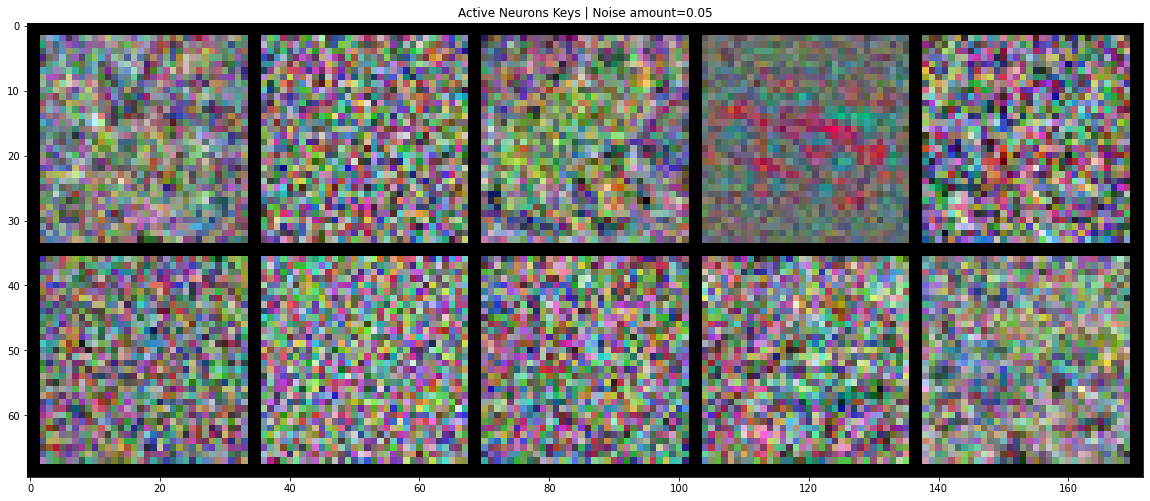

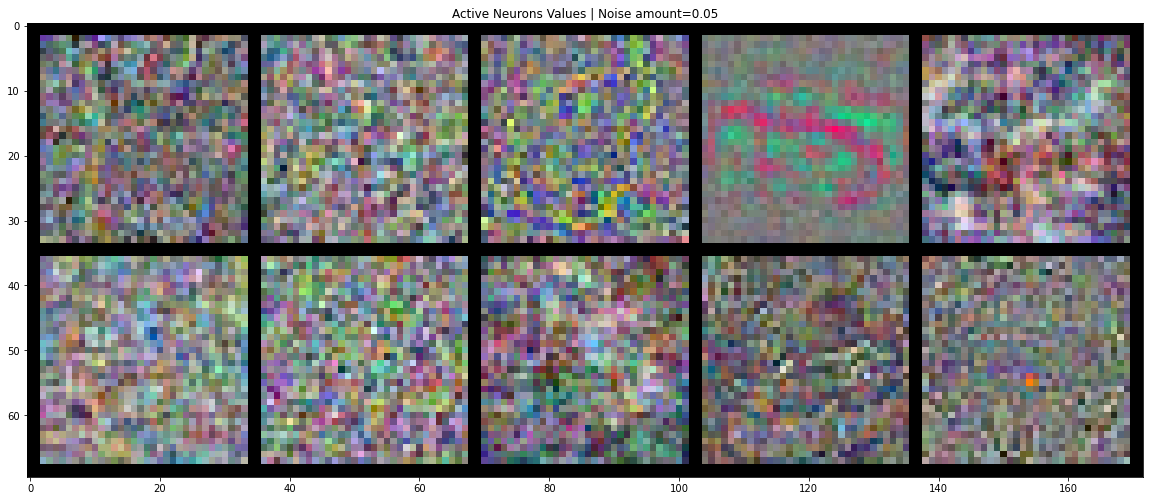

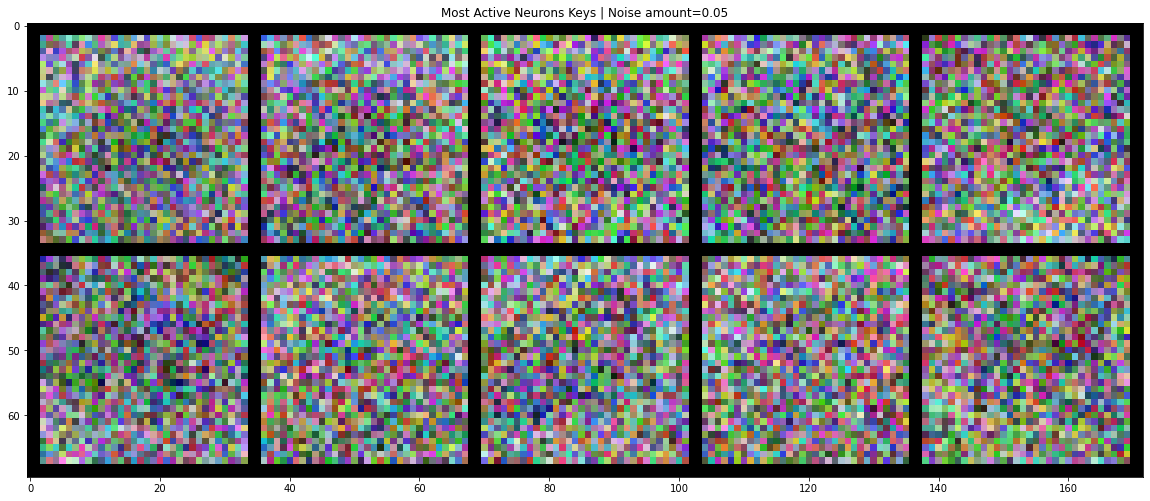

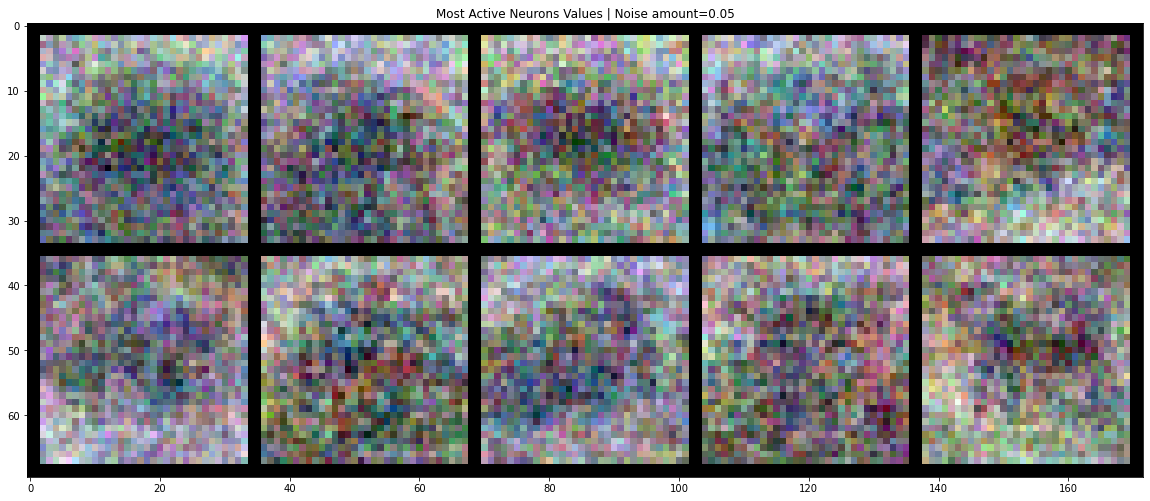

Mean cosine similarity tensor(0.3534)
Activity weighted mean cosine similarity tensor(0.6010)


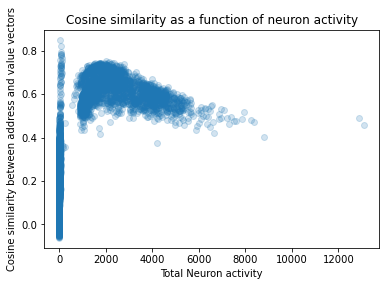

Noise amount: 0.1
Checkpoints found ['../../scratch_link/Foundational-SDM/wandb_Logger/0.1Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=939-step=46060.ckpt']
Load from checkpoint ../../scratch_link/Foundational-SDM/wandb_Logger/0.1Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=939-step=46060.ckpt /home/tbricken/SDM-Diffusion/notebooks
activity threshold is: 0.0


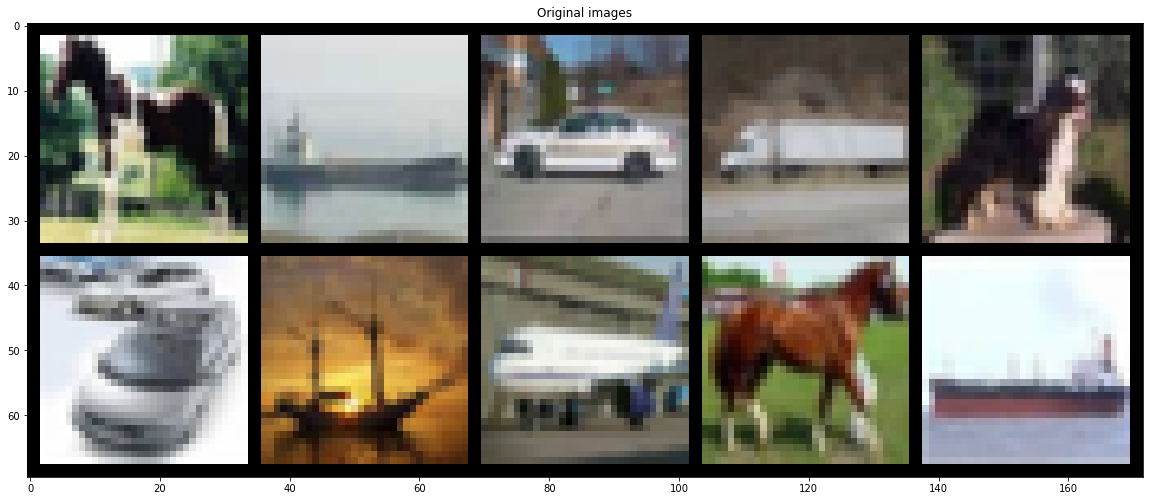

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


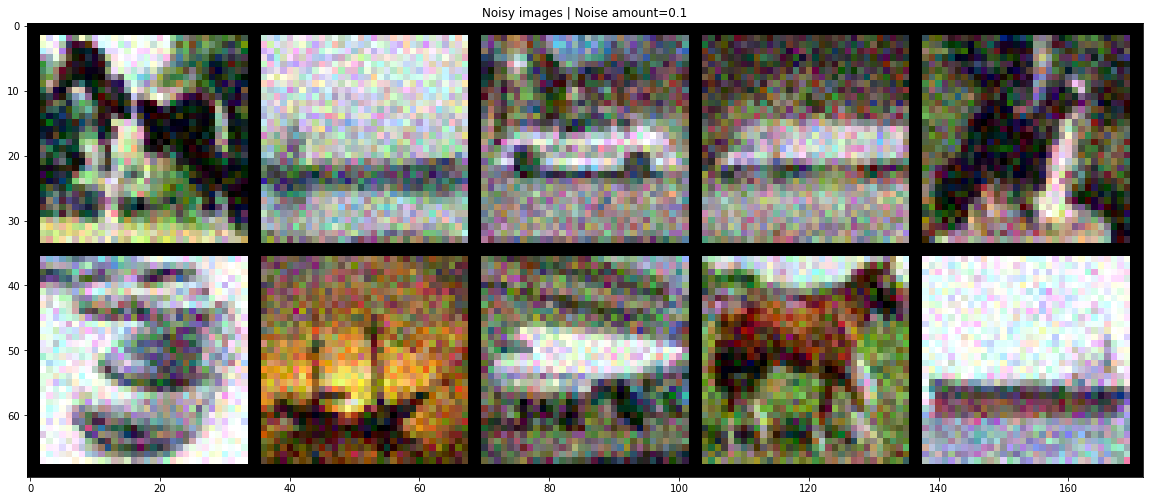

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


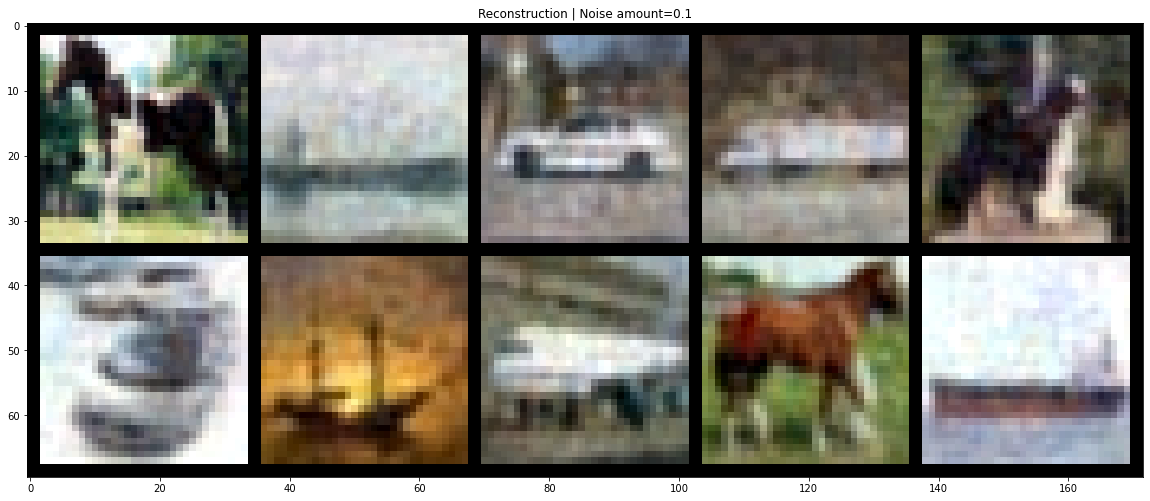

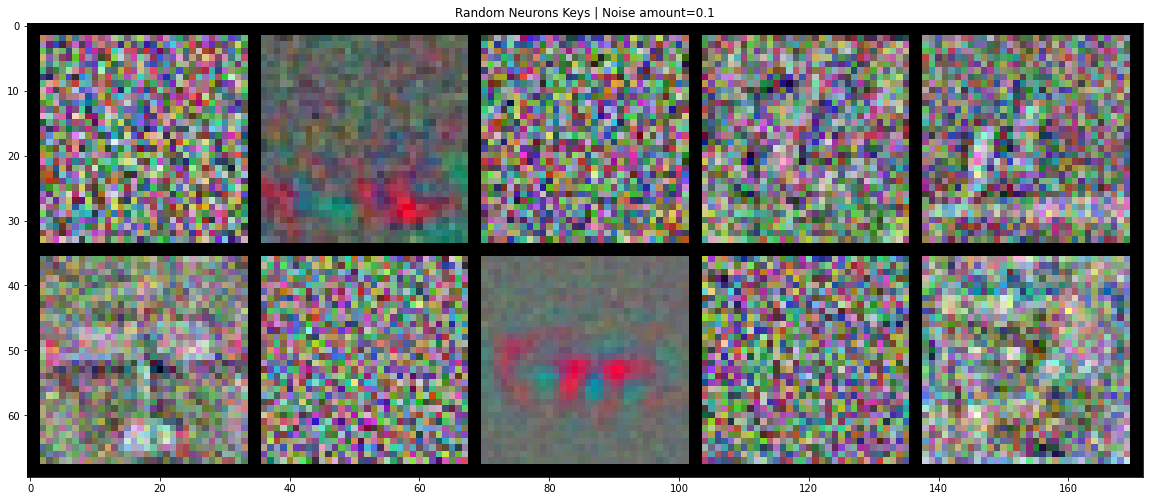

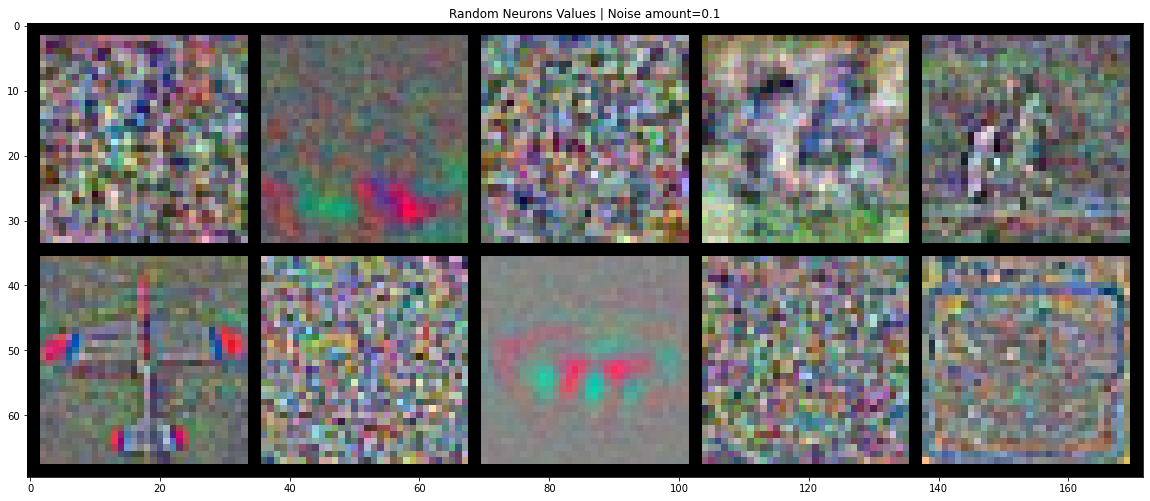

Batch 0
Fraction of alive neurons tensor(0.6594)


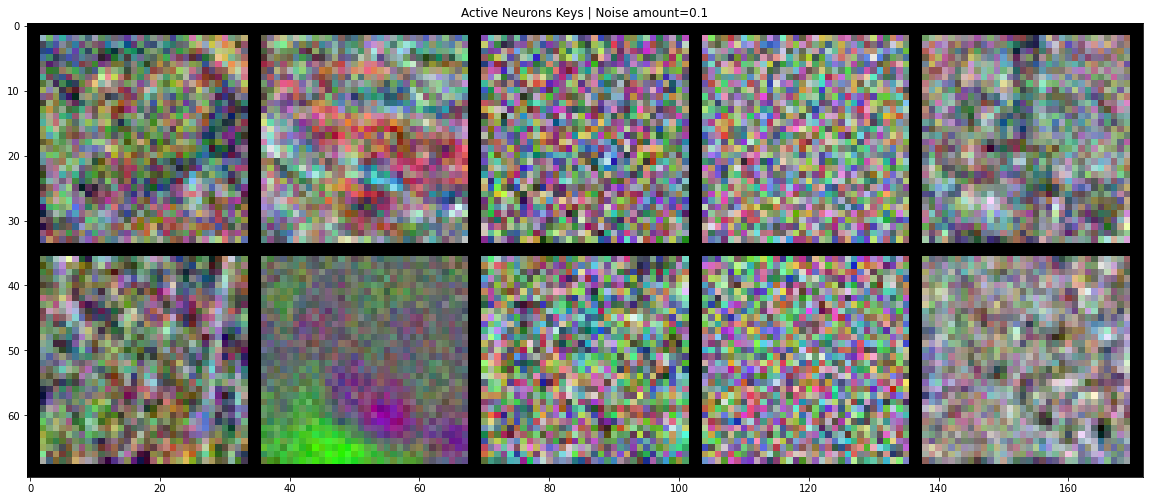

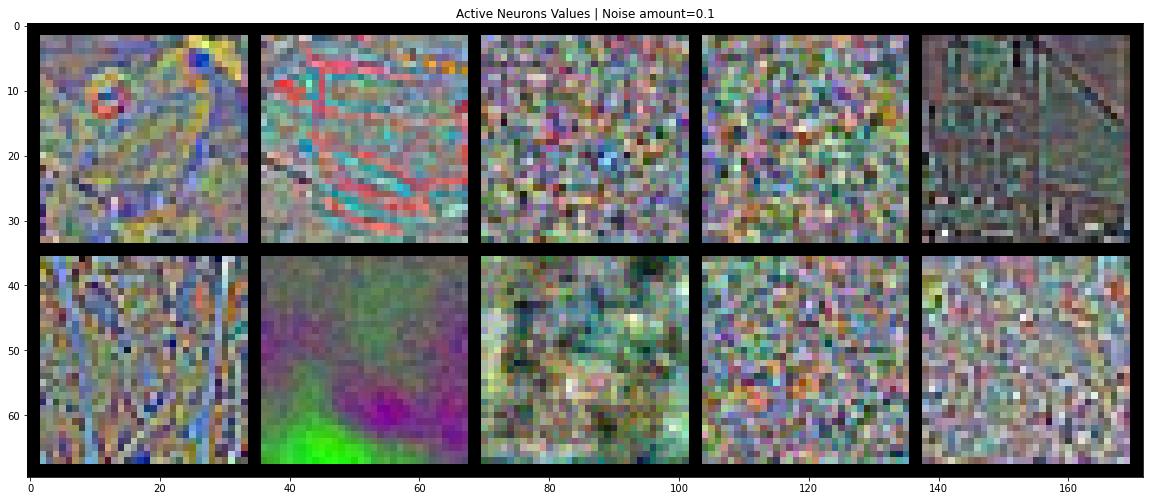

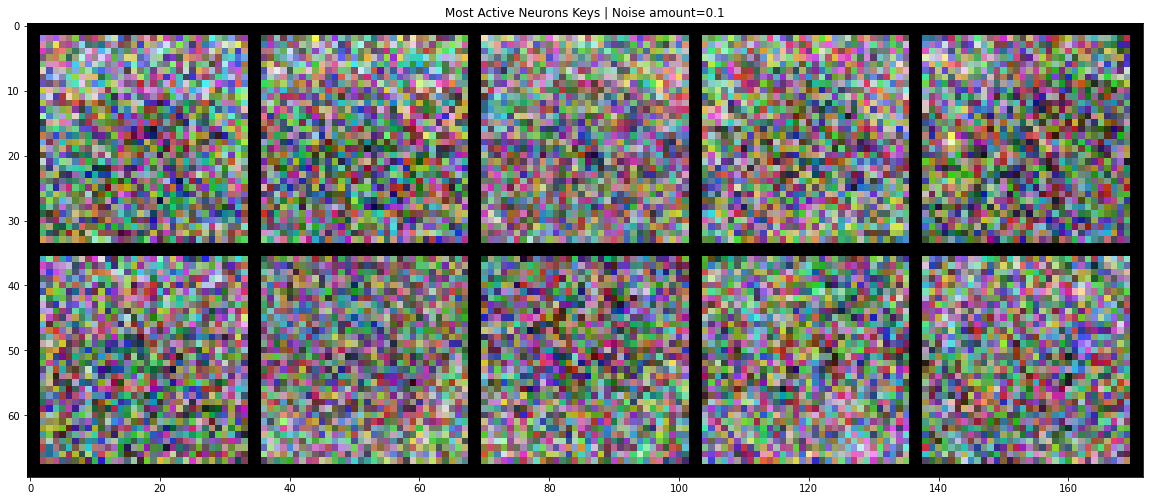

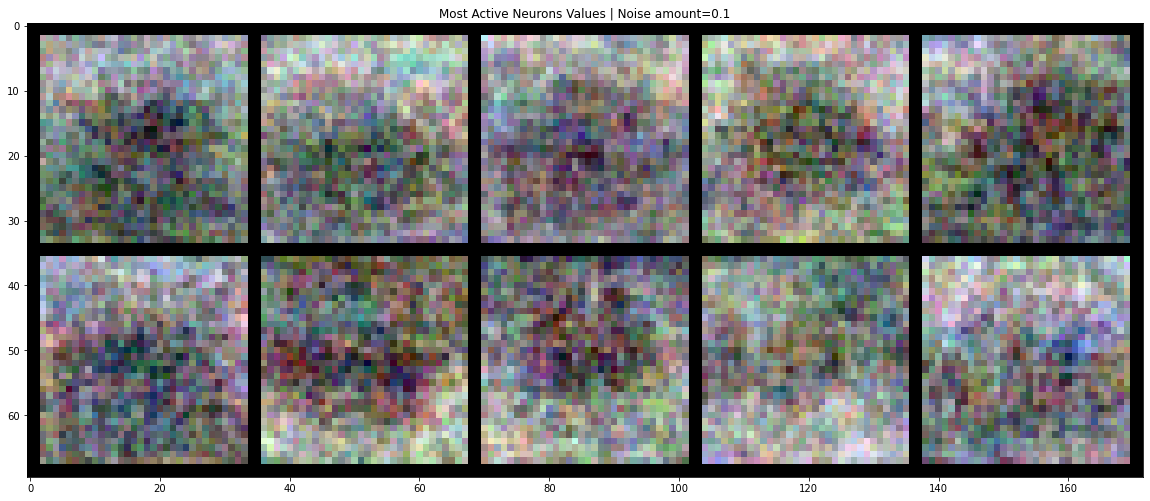

Mean cosine similarity tensor(0.3342)
Activity weighted mean cosine similarity tensor(0.5462)


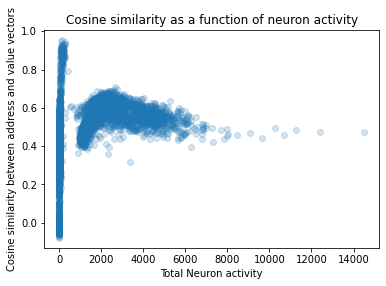

Noise amount: 0.3
Checkpoints found ['../../scratch_link/Foundational-SDM/wandb_Logger/0.3Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=929-step=45570.ckpt']
Load from checkpoint ../../scratch_link/Foundational-SDM/wandb_Logger/0.3Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=929-step=45570.ckpt /home/tbricken/SDM-Diffusion/notebooks
activity threshold is: 0.0


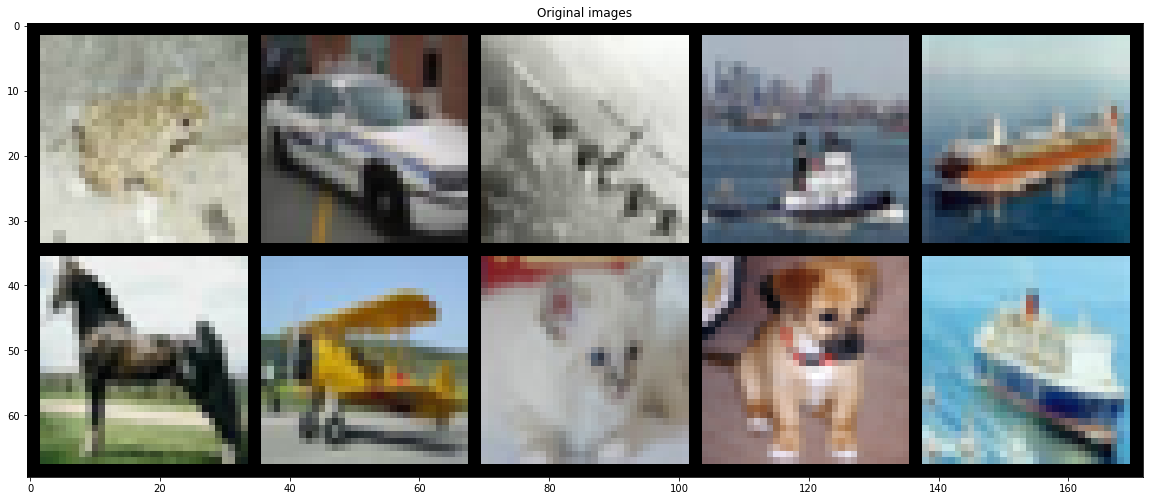

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


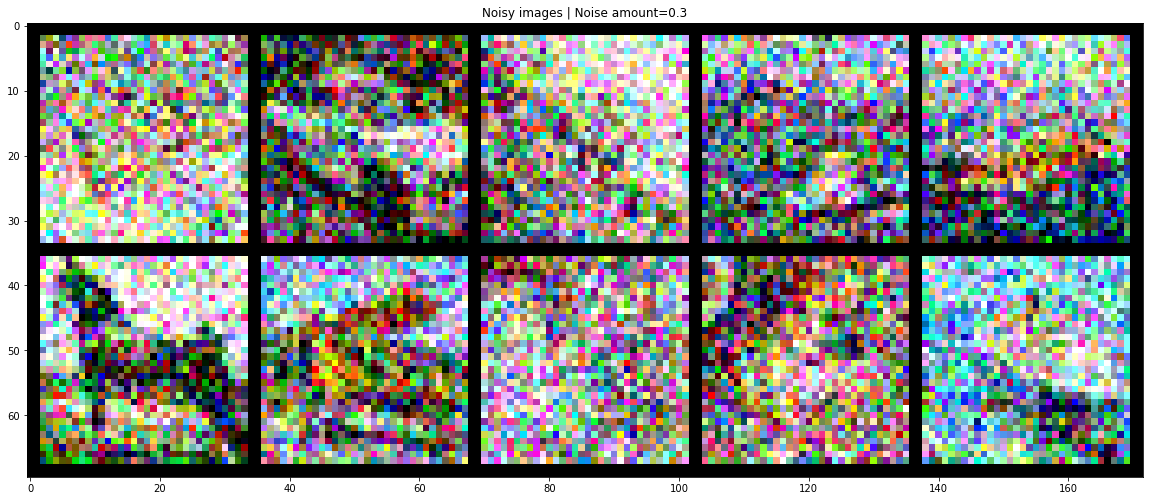

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


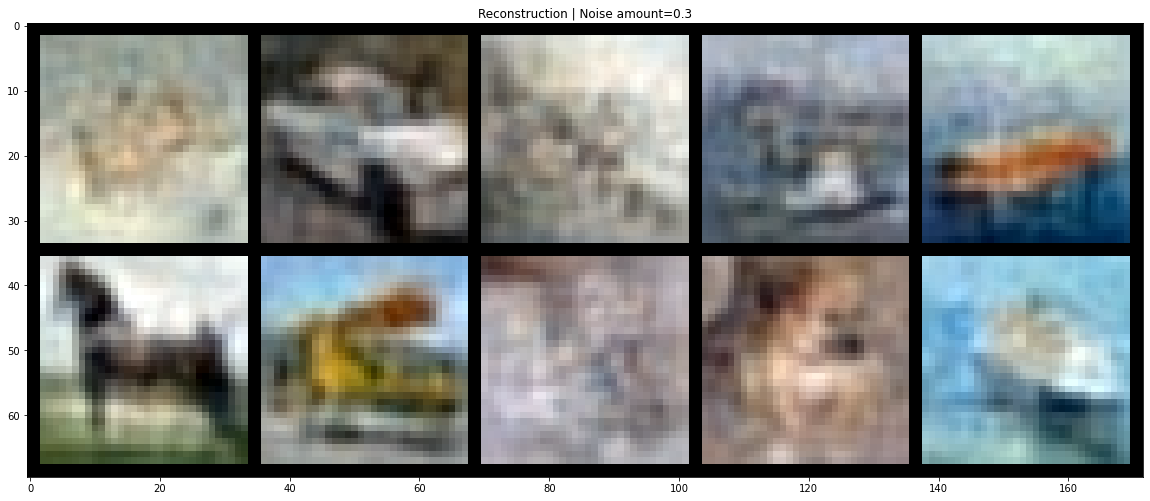

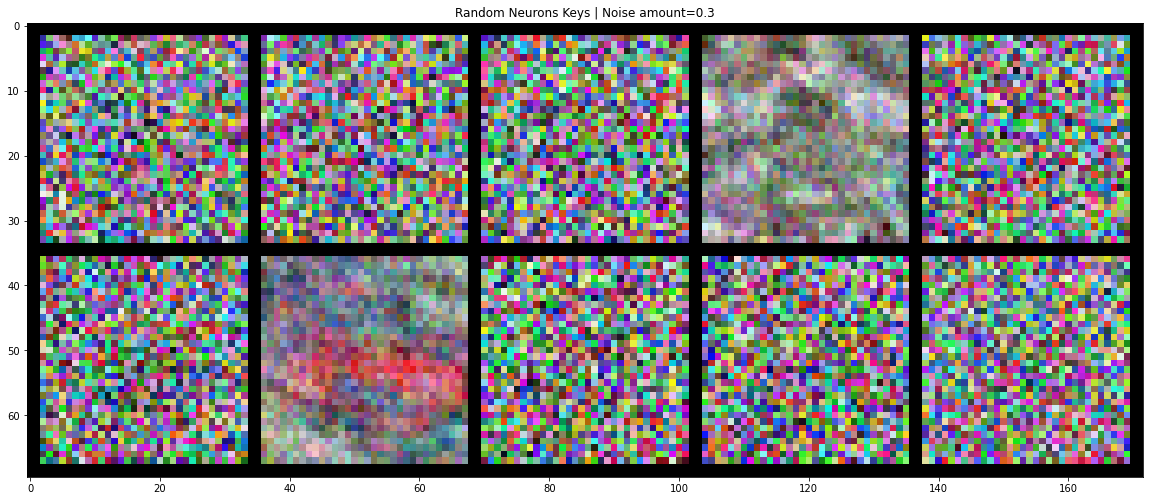

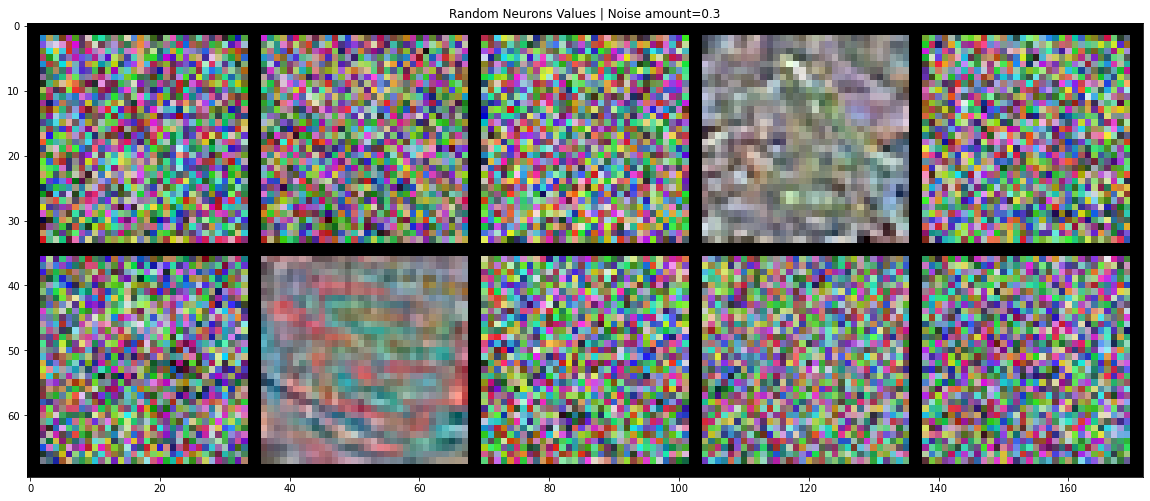

Batch 0
Fraction of alive neurons tensor(0.2359)


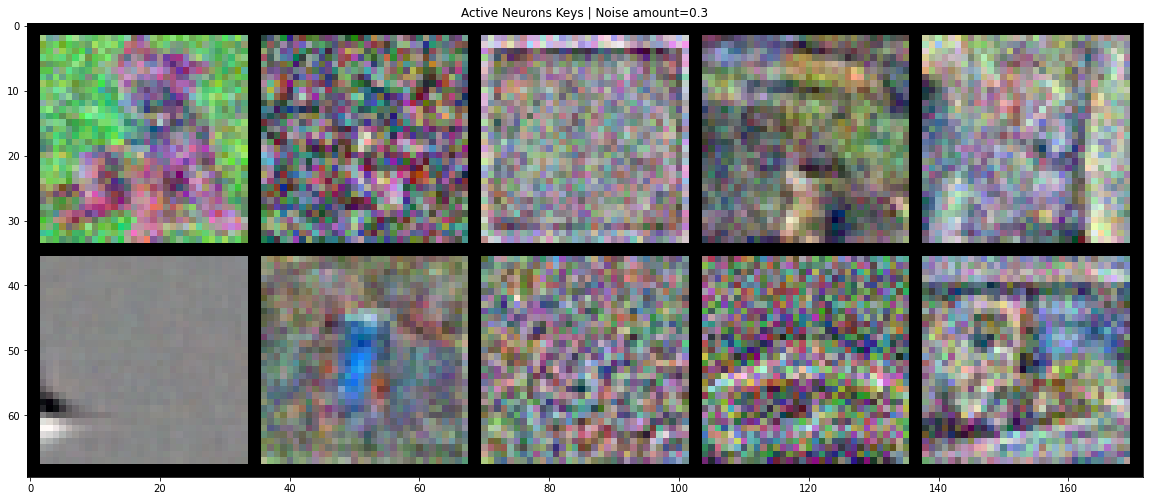

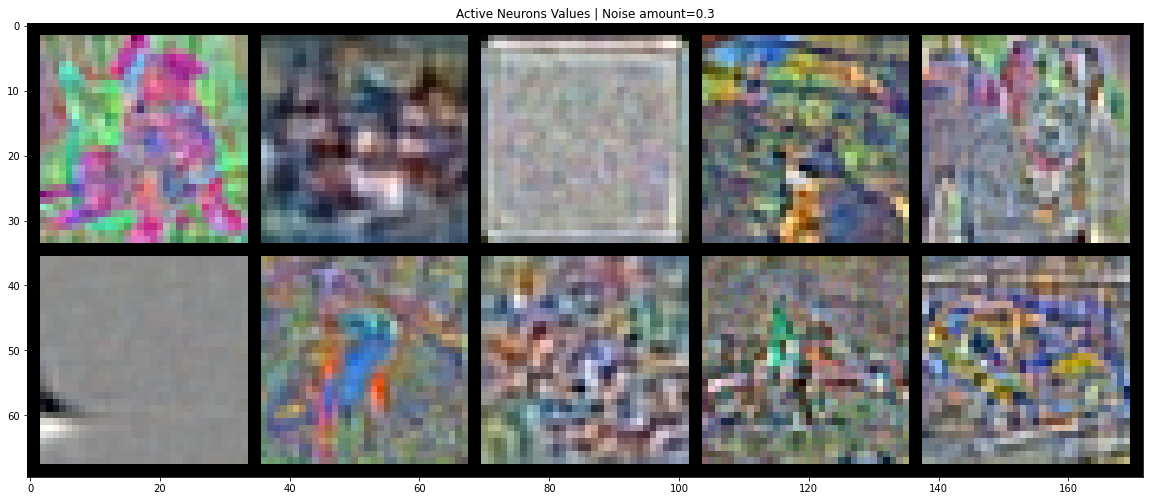

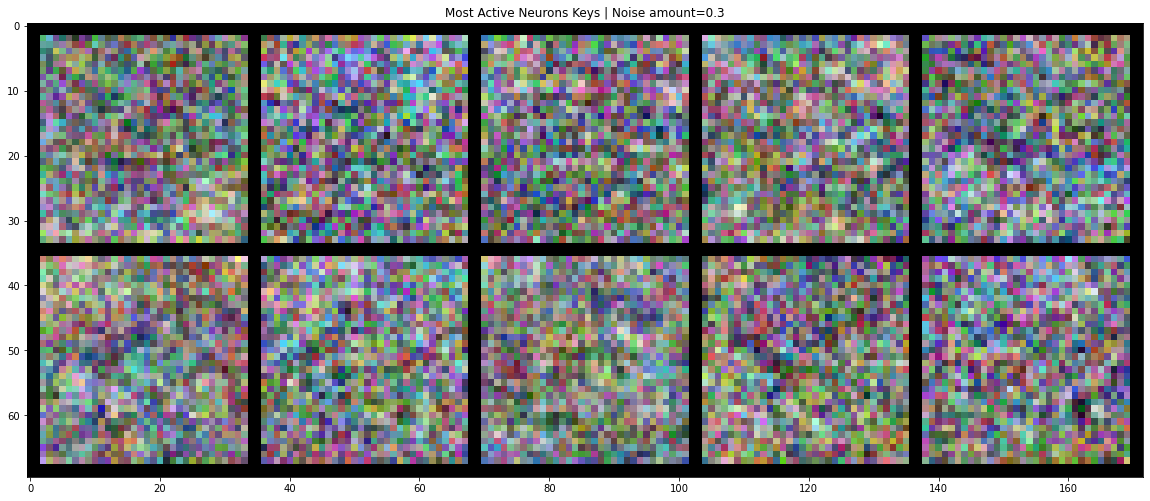

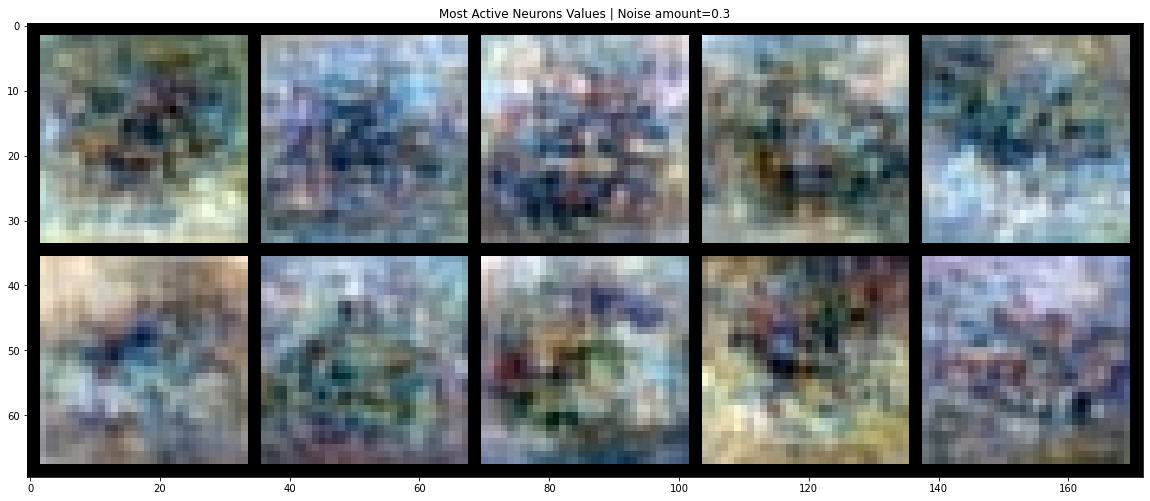

Mean cosine similarity tensor(0.1605)
Activity weighted mean cosine similarity tensor(0.6158)


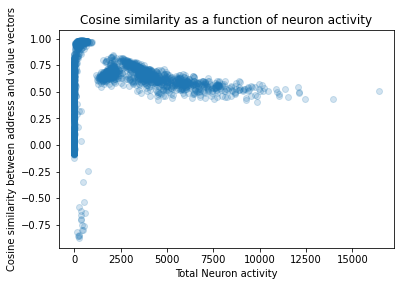

Noise amount: 0.8
Checkpoints found ['../../scratch_link/Foundational-SDM/wandb_Logger/0.8Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=939-step=46060.ckpt']
Load from checkpoint ../../scratch_link/Foundational-SDM/wandb_Logger/0.8Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=939-step=46060.ckpt /home/tbricken/SDM-Diffusion/notebooks
activity threshold is: 0.0


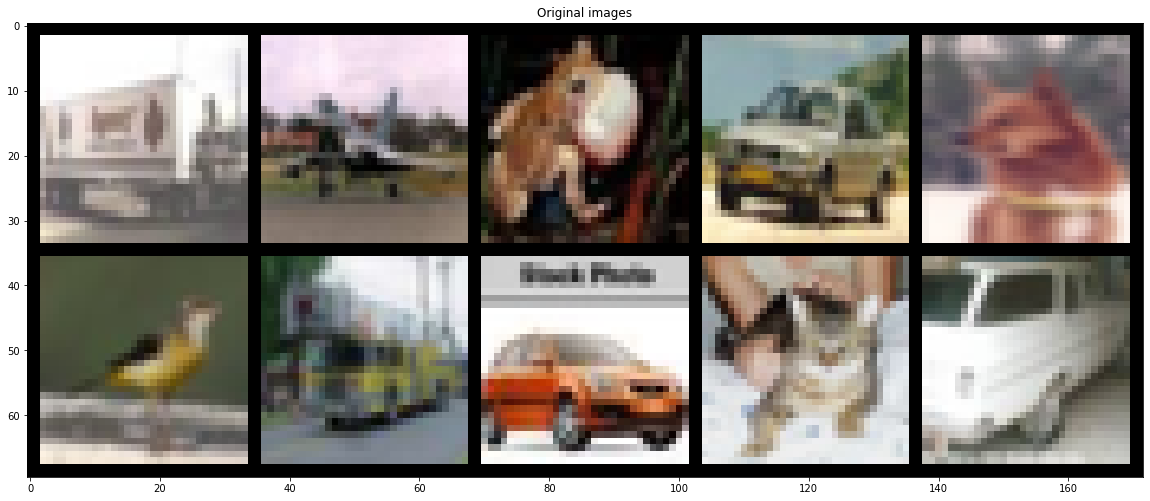

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


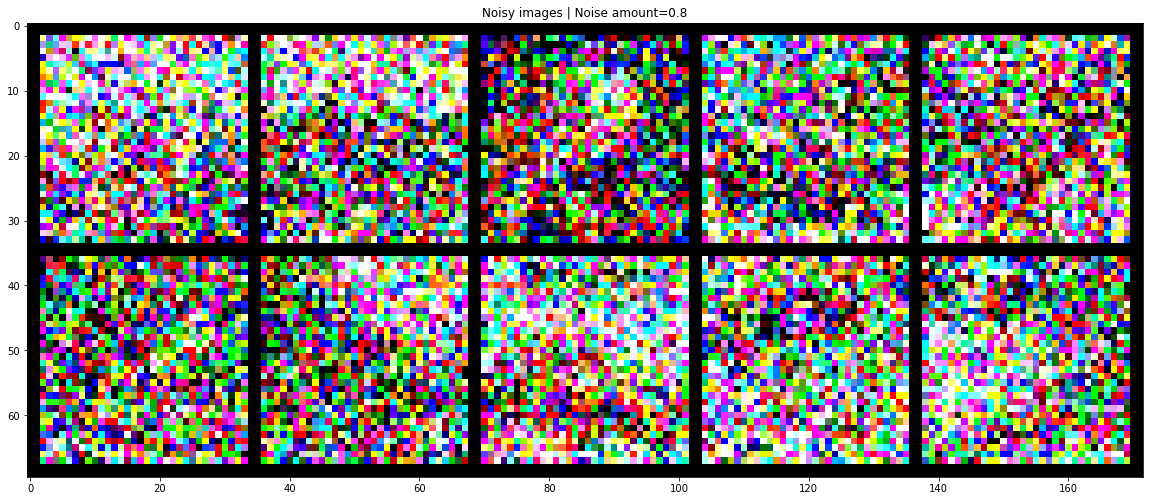

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


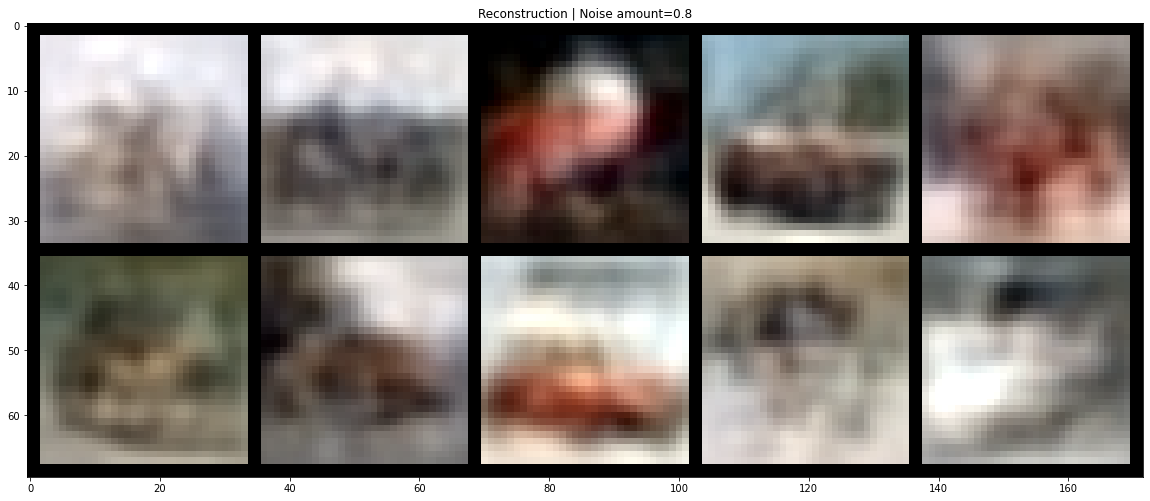

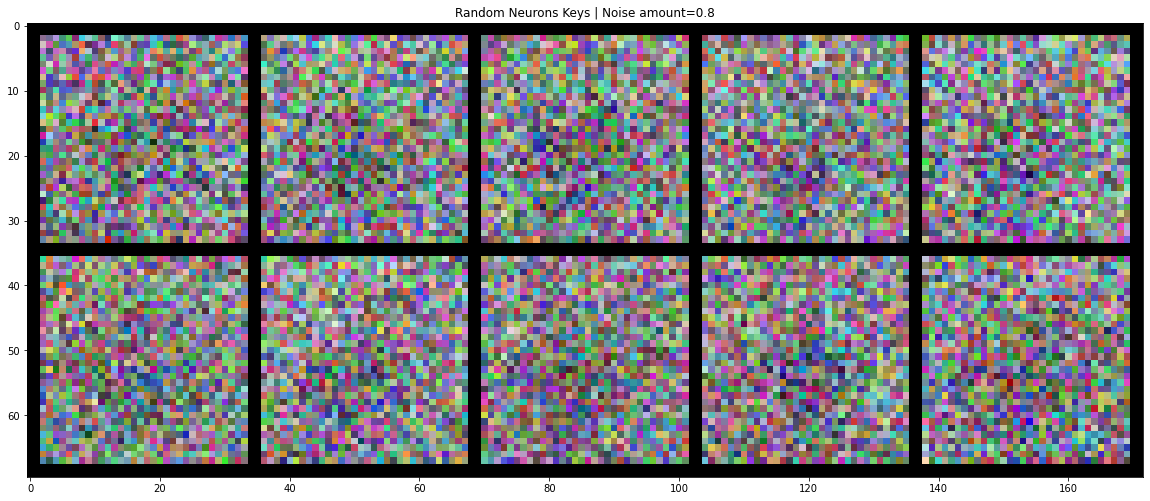

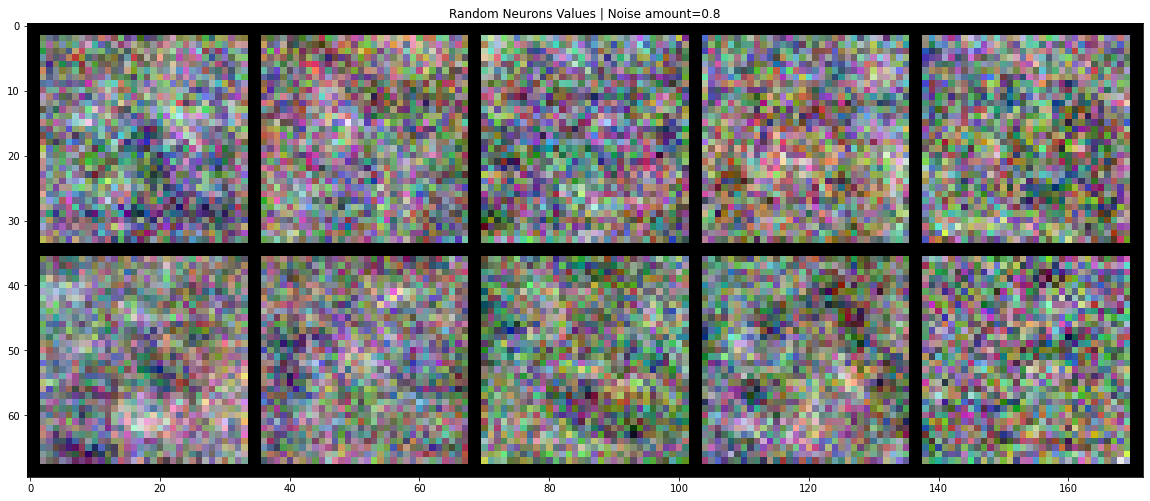

Batch 0
Fraction of alive neurons tensor(0.0643)


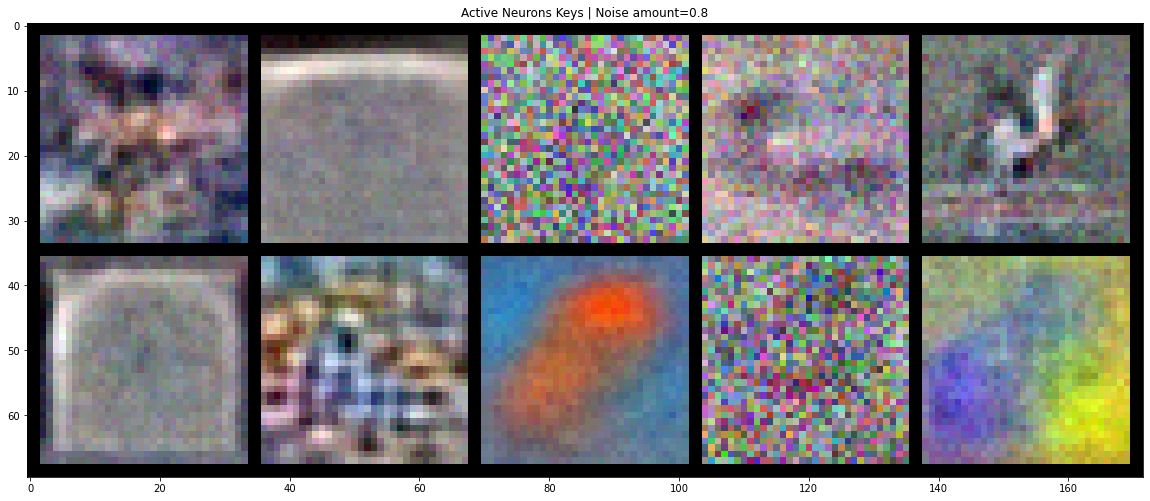

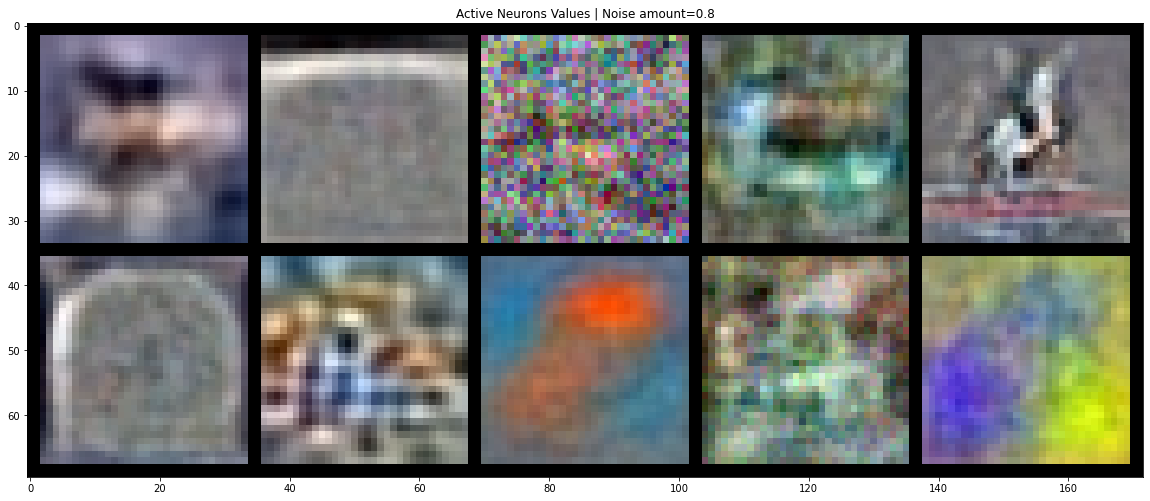

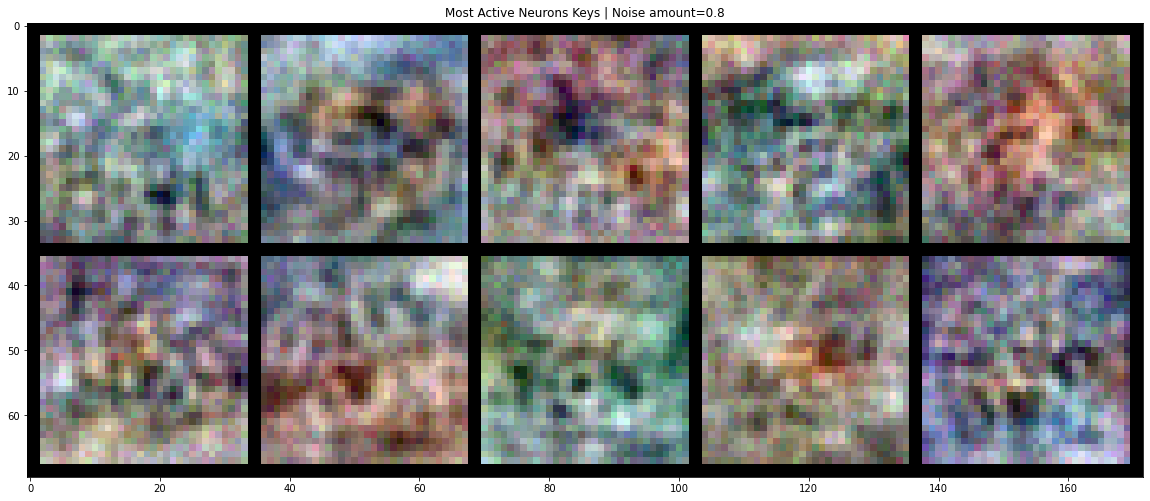

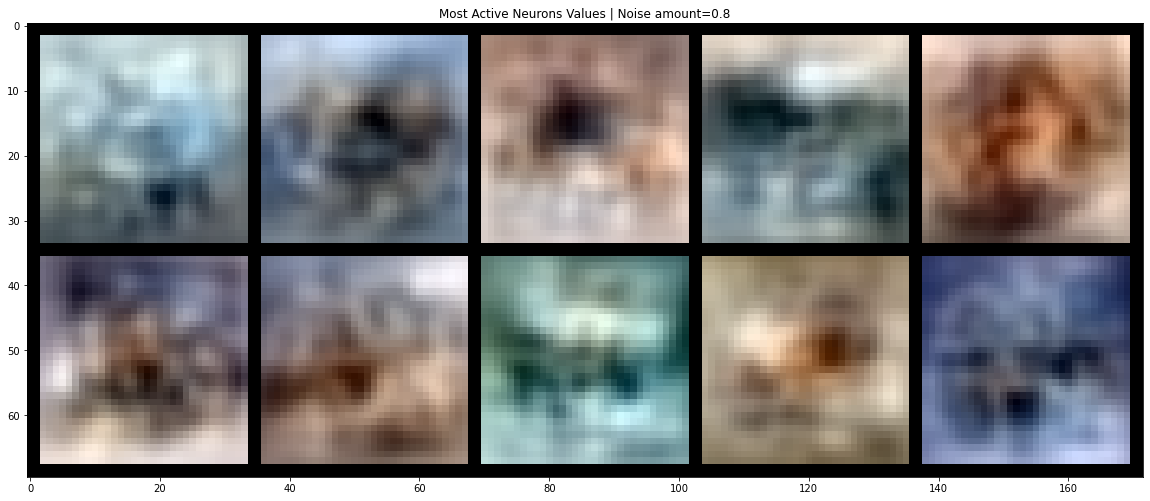

Mean cosine similarity tensor(0.0033)
Activity weighted mean cosine similarity tensor(0.8505)


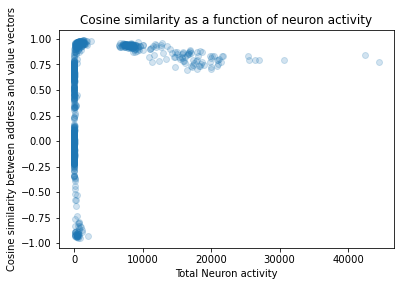

Noise amount: 1.5
Checkpoints found ['../../scratch_link/Foundational-SDM/wandb_Logger/1.5Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=939-step=46060.ckpt']
Load from checkpoint ../../scratch_link/Foundational-SDM/wandb_Logger/1.5Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=939-step=46060.ckpt /home/tbricken/SDM-Diffusion/notebooks
activity threshold is: 0.0


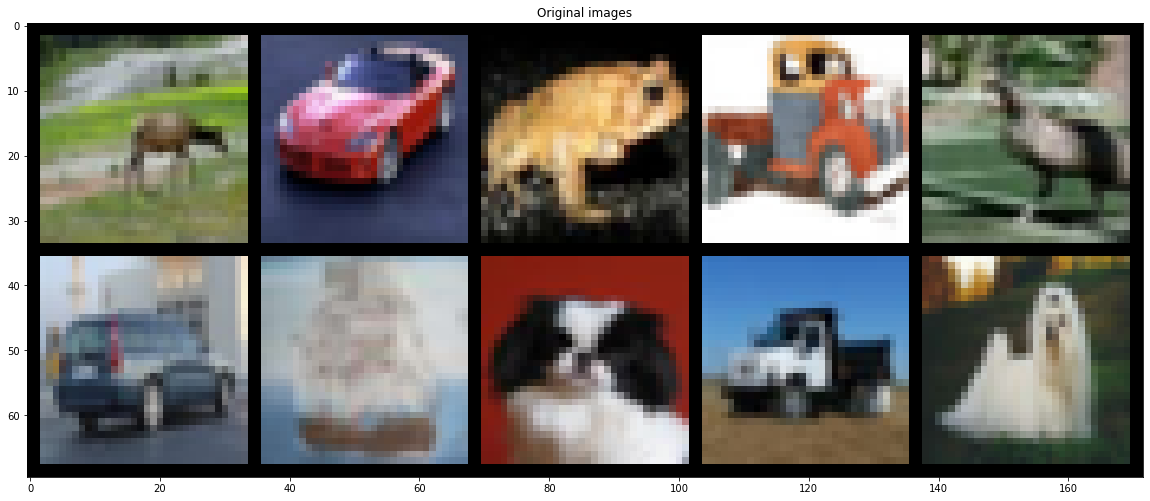

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


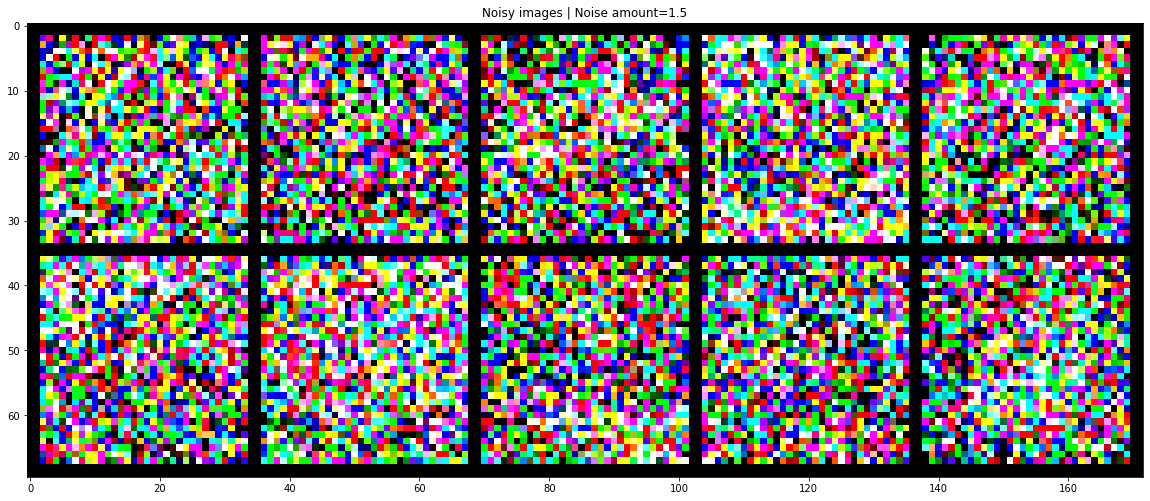

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


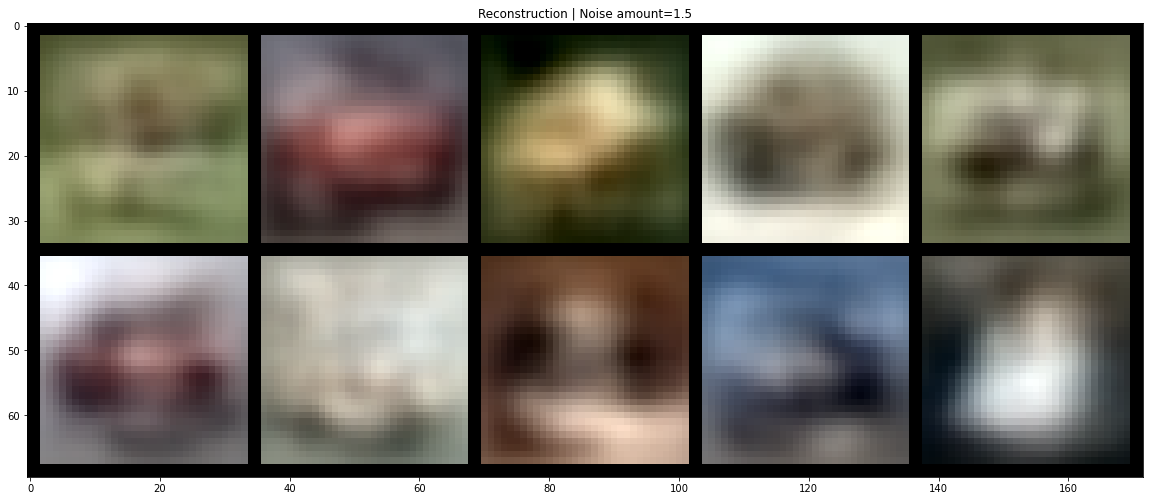

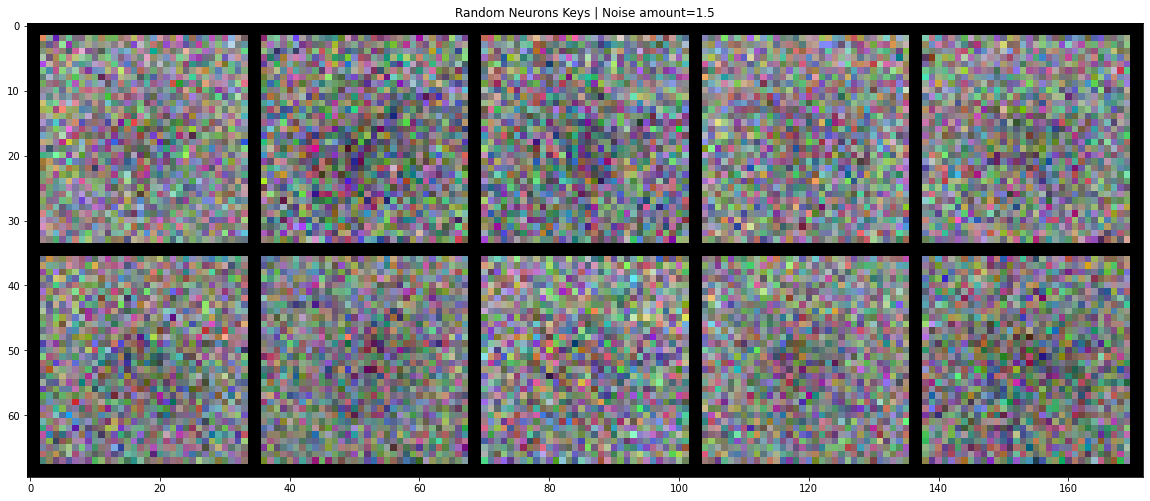

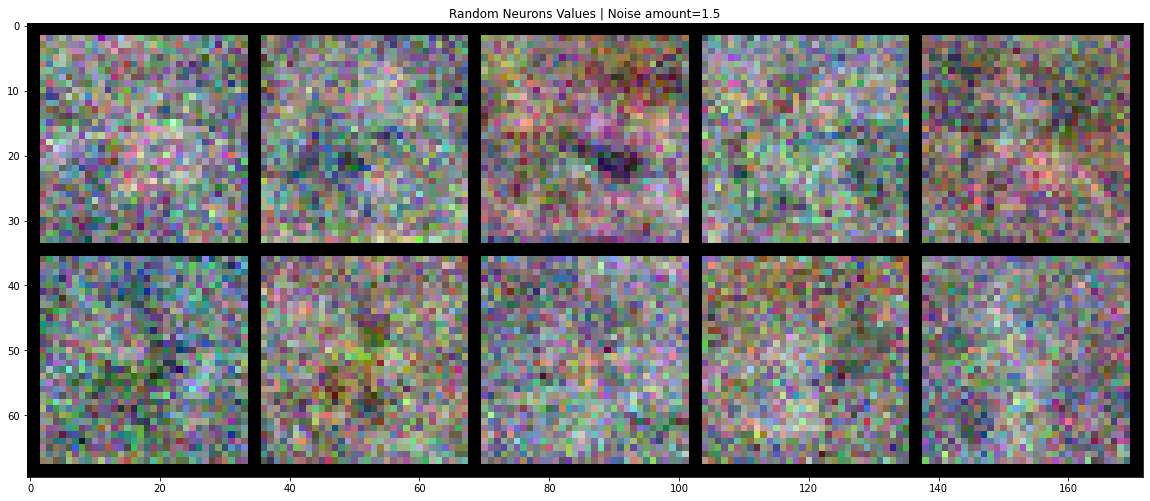

Batch 0
Fraction of alive neurons tensor(0.2902)


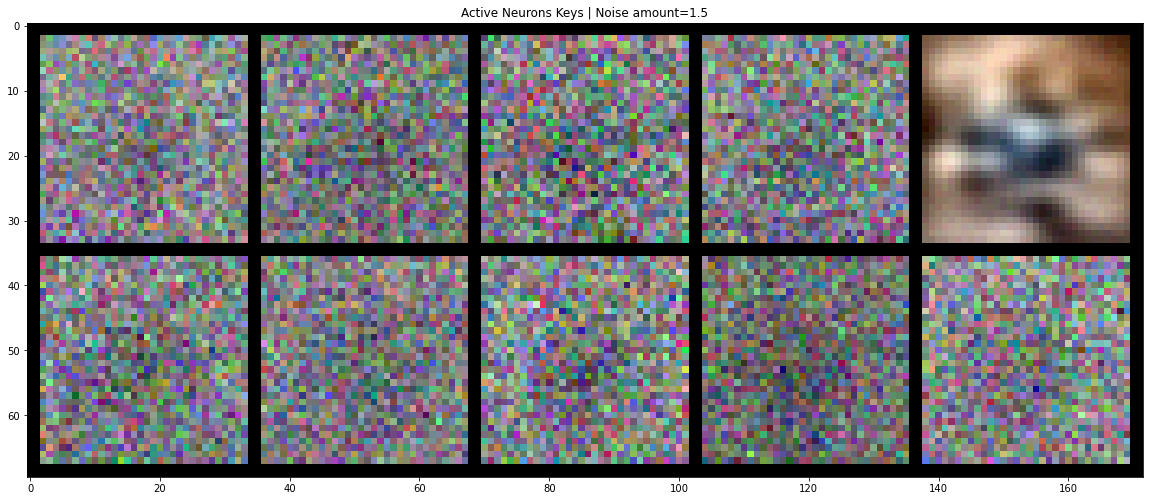

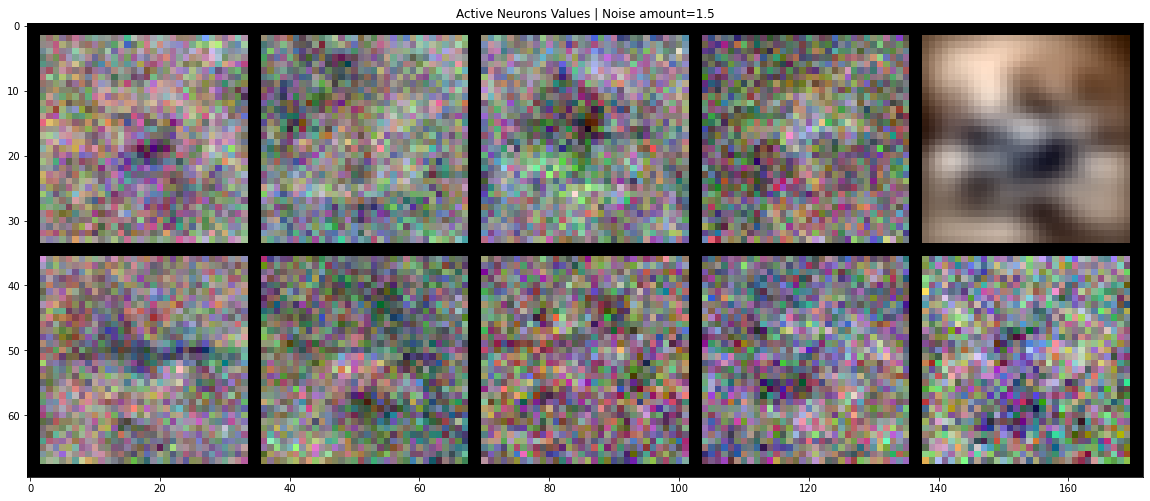

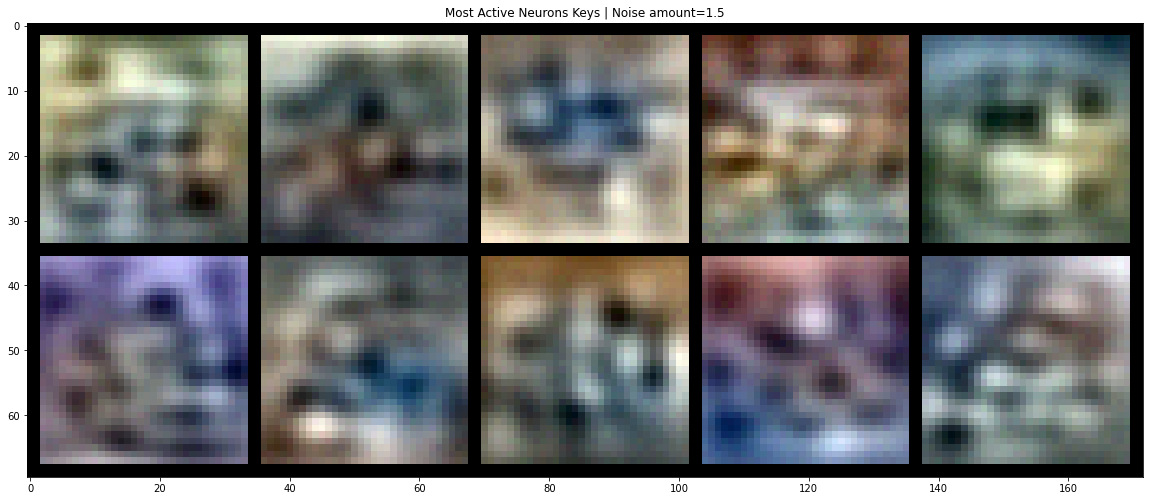

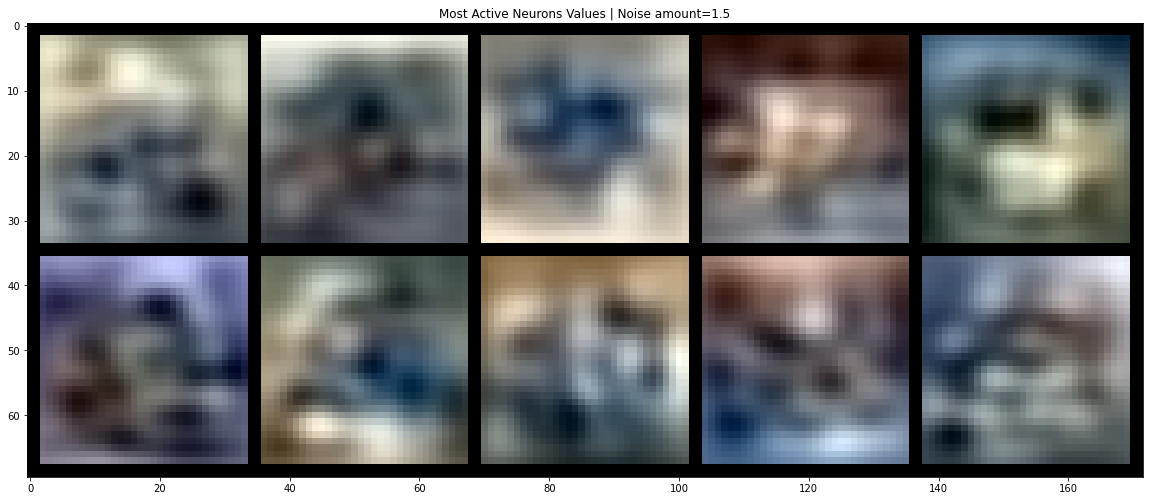

Mean cosine similarity tensor(0.0075)
Activity weighted mean cosine similarity tensor(0.9450)


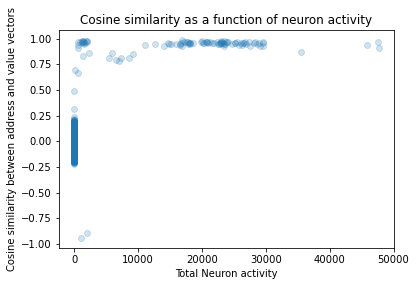

Noise amount: 3.0
Checkpoints found ['../../scratch_link/Foundational-SDM/wandb_Logger/3.0Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=939-step=46060.ckpt']
Load from checkpoint ../../scratch_link/Foundational-SDM/wandb_Logger/3.0Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=939-step=46060.ckpt /home/tbricken/SDM-Diffusion/notebooks
activity threshold is: 0.0


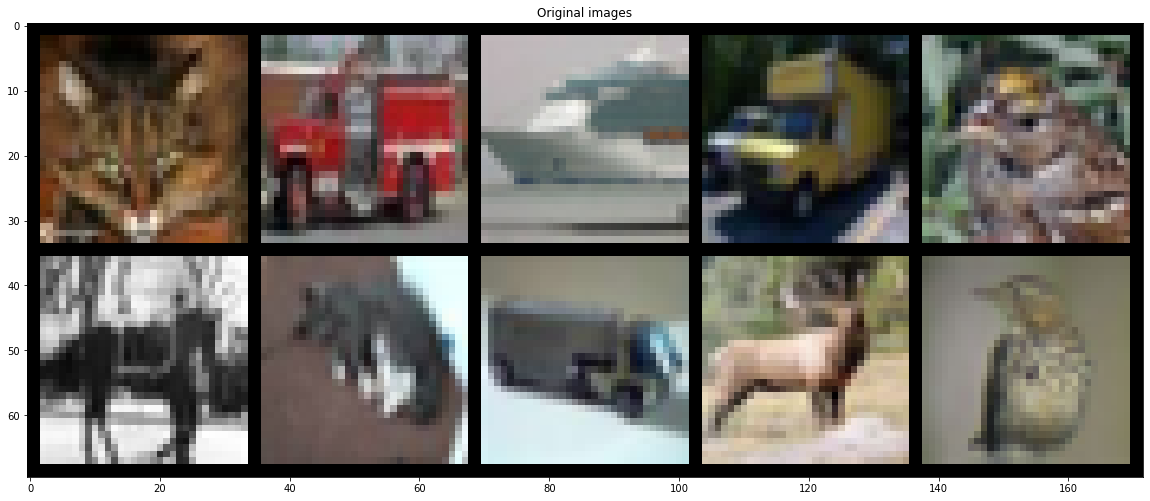

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


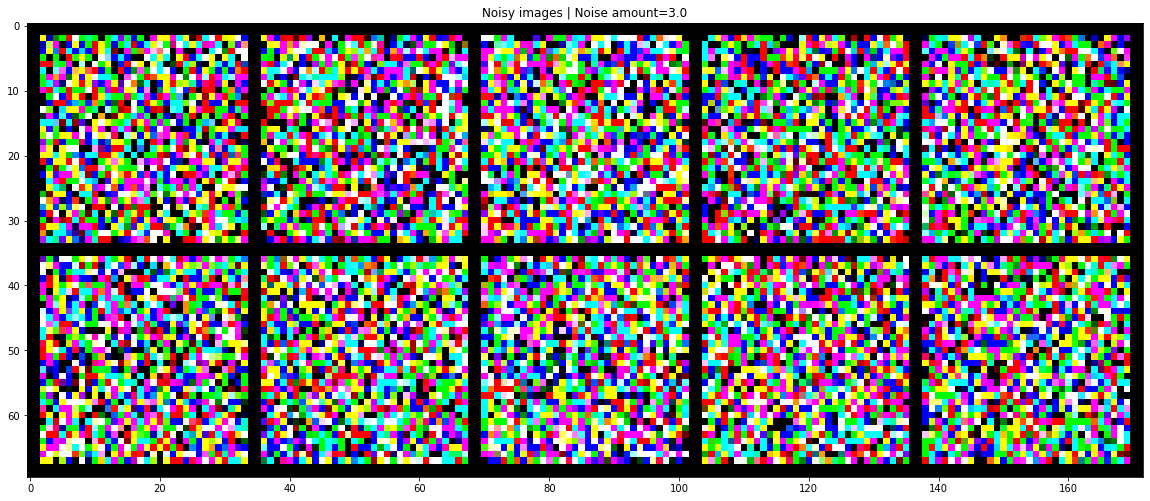

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


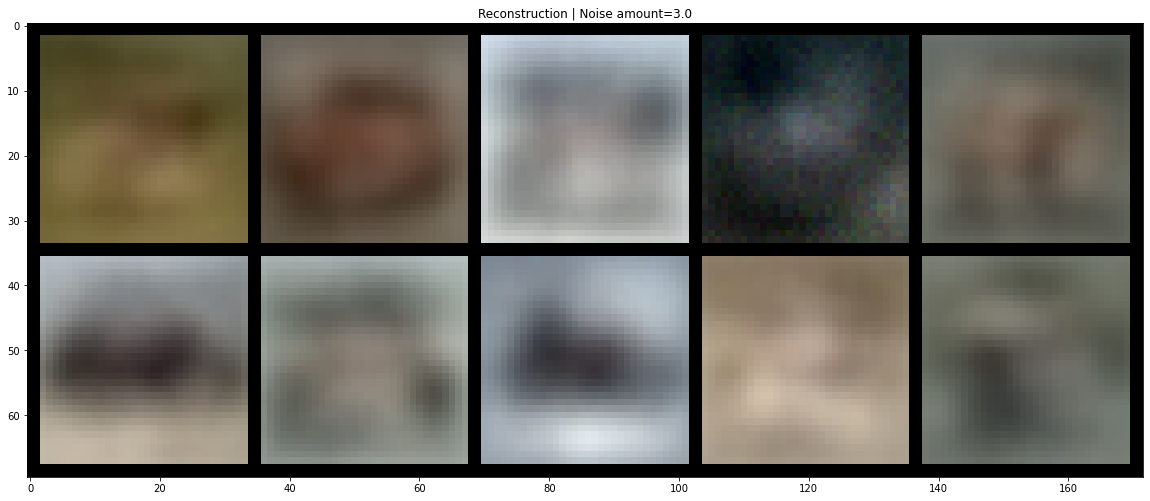

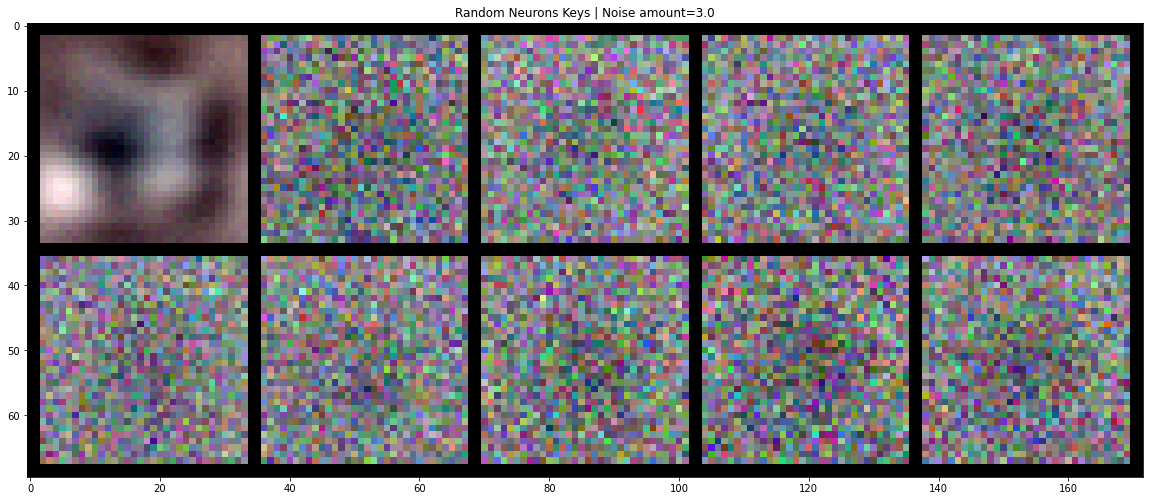

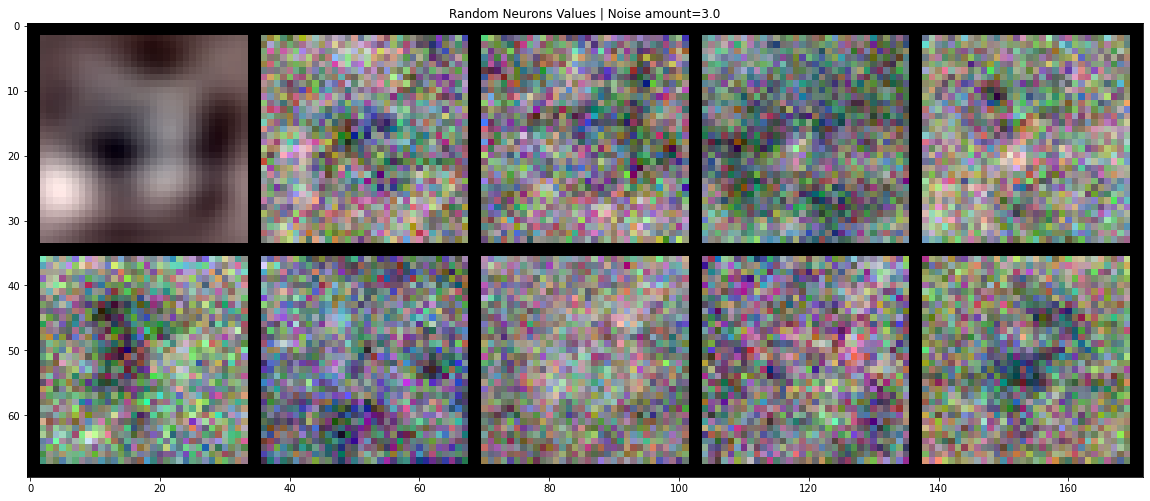

Batch 0
Fraction of alive neurons tensor(0.7644)


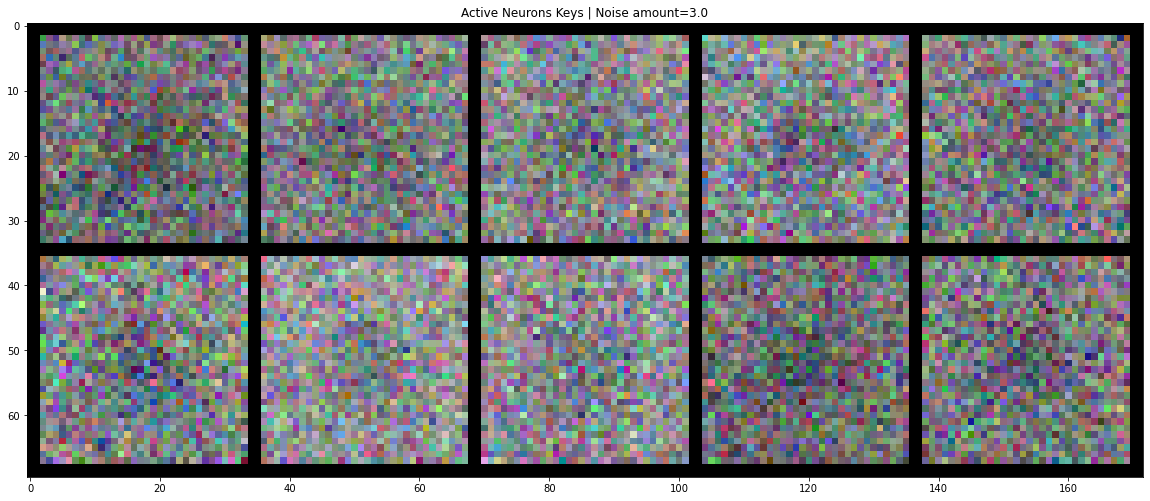

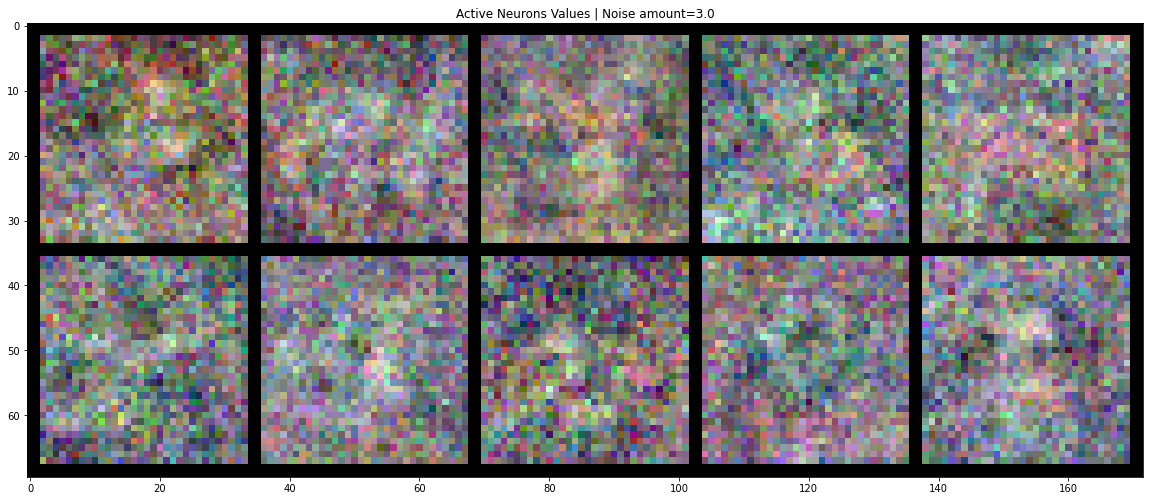

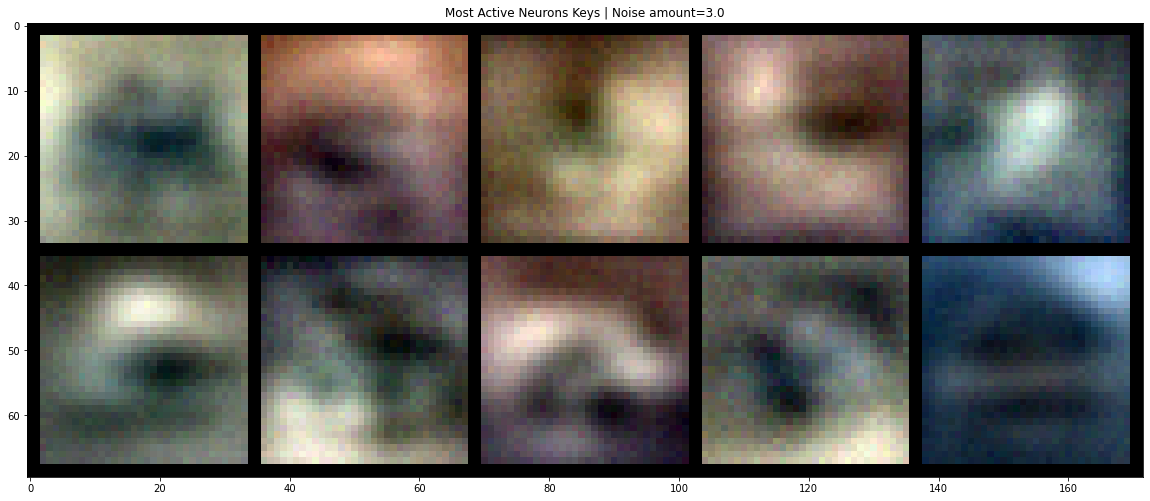

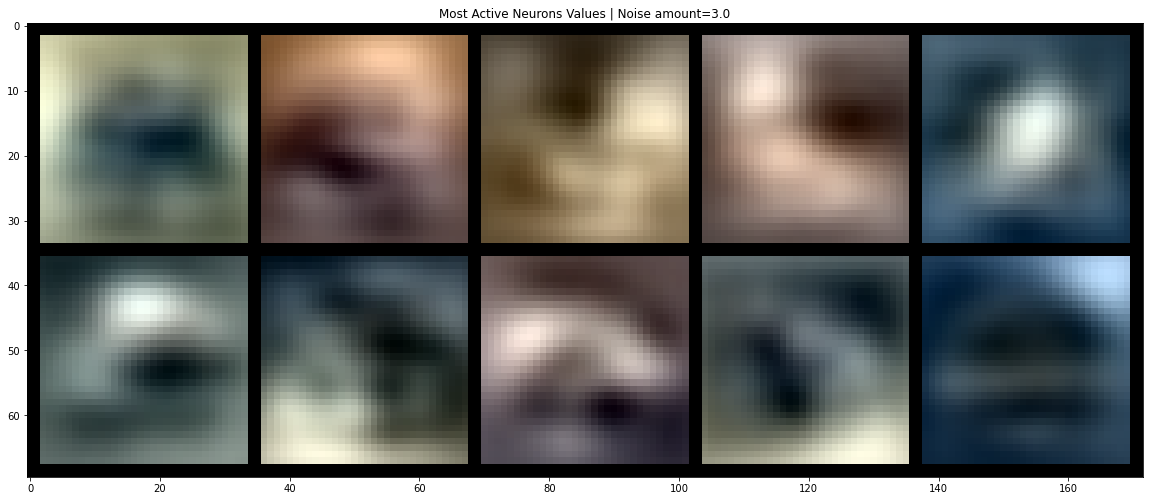

Mean cosine similarity tensor(0.0096)
Activity weighted mean cosine similarity tensor(0.8925)


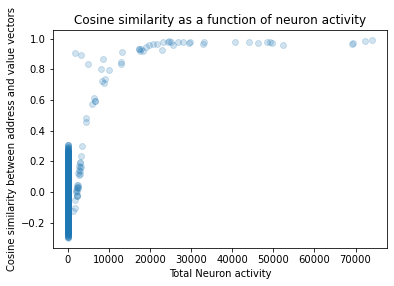

Noise amount: 10.0
Checkpoints found ['../../scratch_link/Foundational-SDM/wandb_Logger/10.0Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=939-step=46060.ckpt']
Load from checkpoint ../../scratch_link/Foundational-SDM/wandb_Logger/10.0Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1/version_None/checkpoints/epoch=939-step=46060.ckpt /home/tbricken/SDM-Diffusion/notebooks
activity threshold is: 0.0


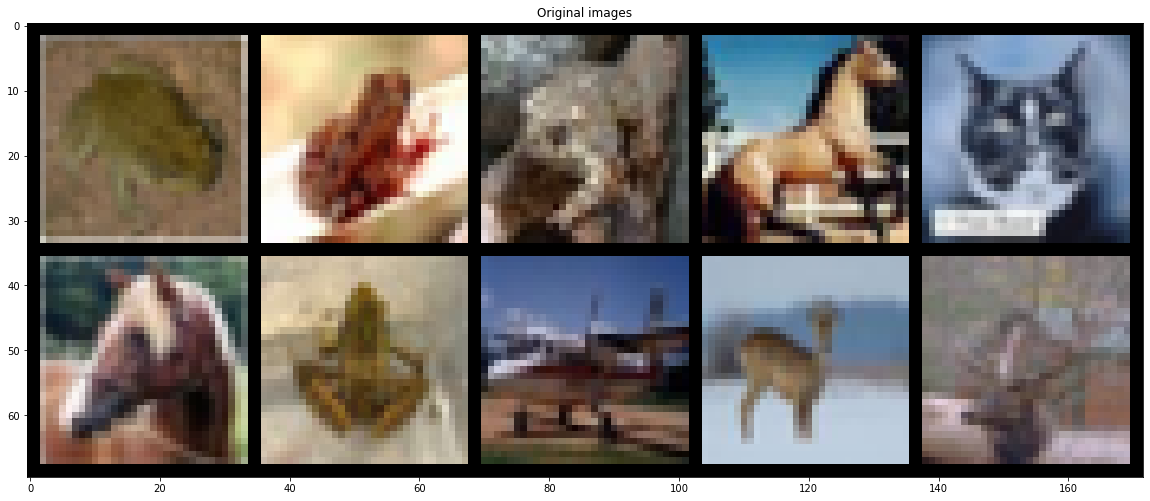

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


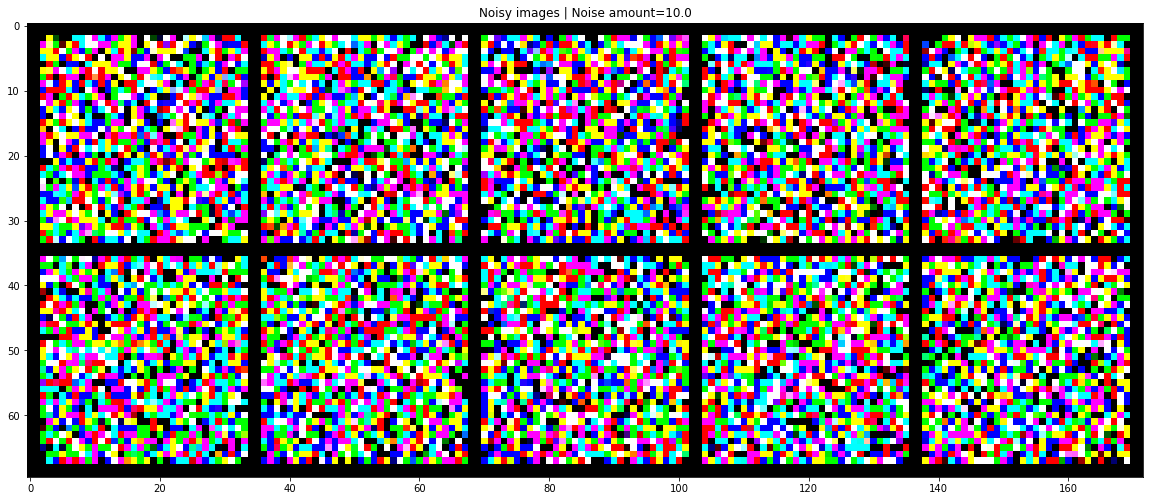

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


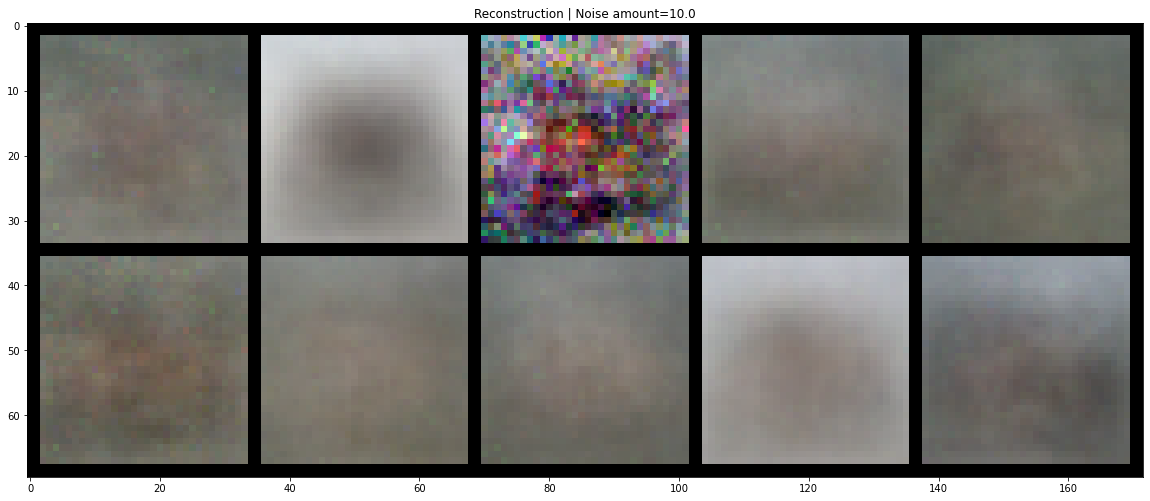

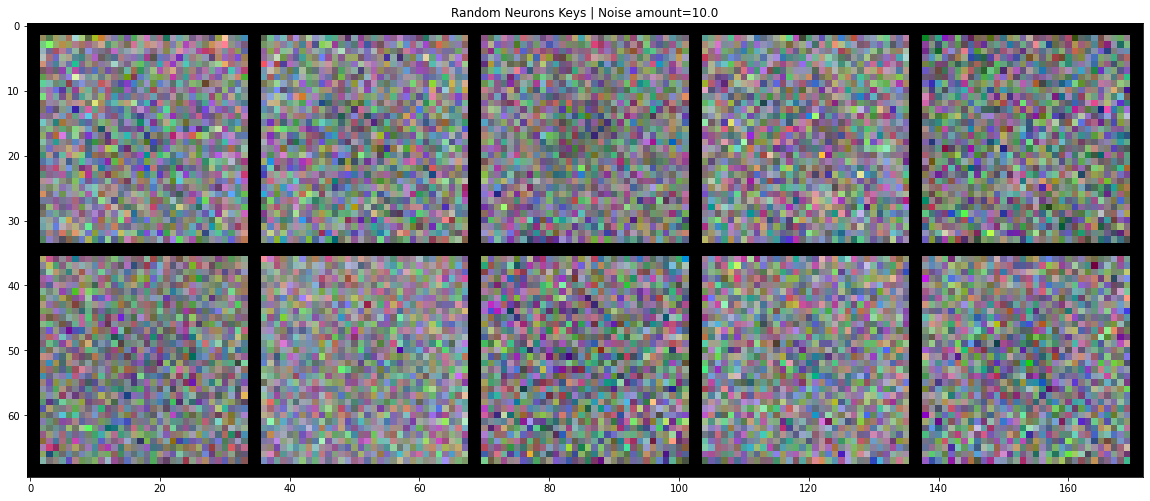

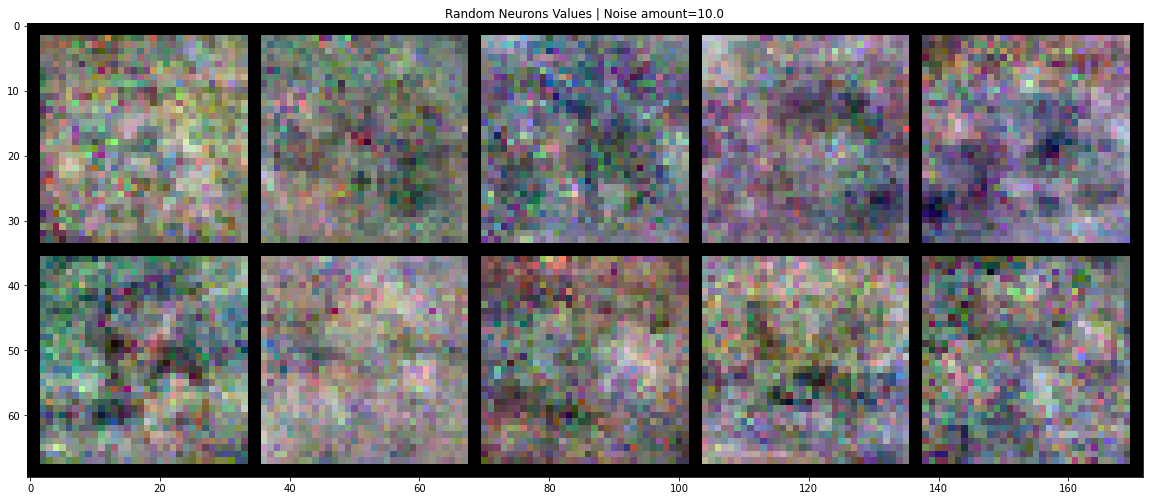

Batch 0
Fraction of alive neurons tensor(1.)


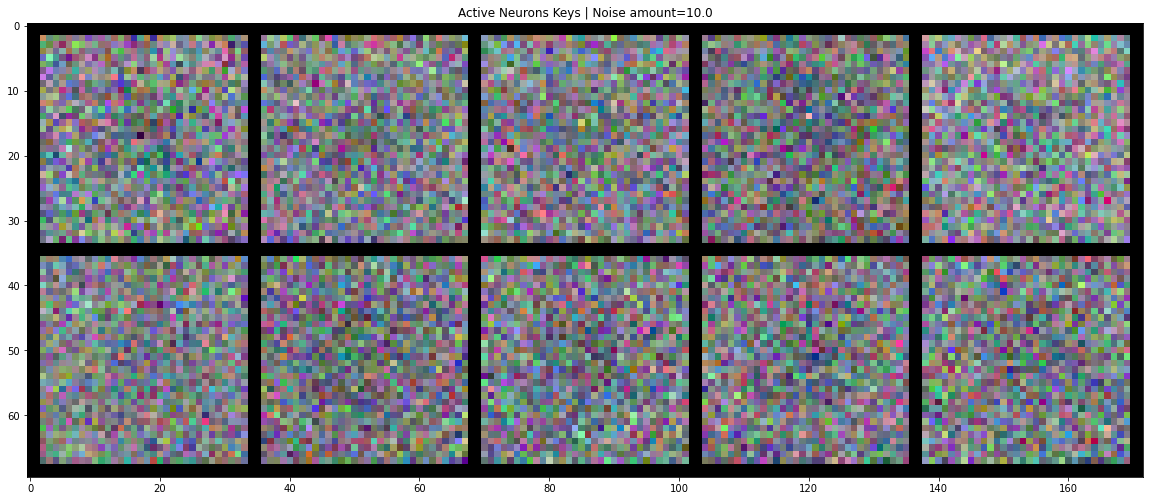

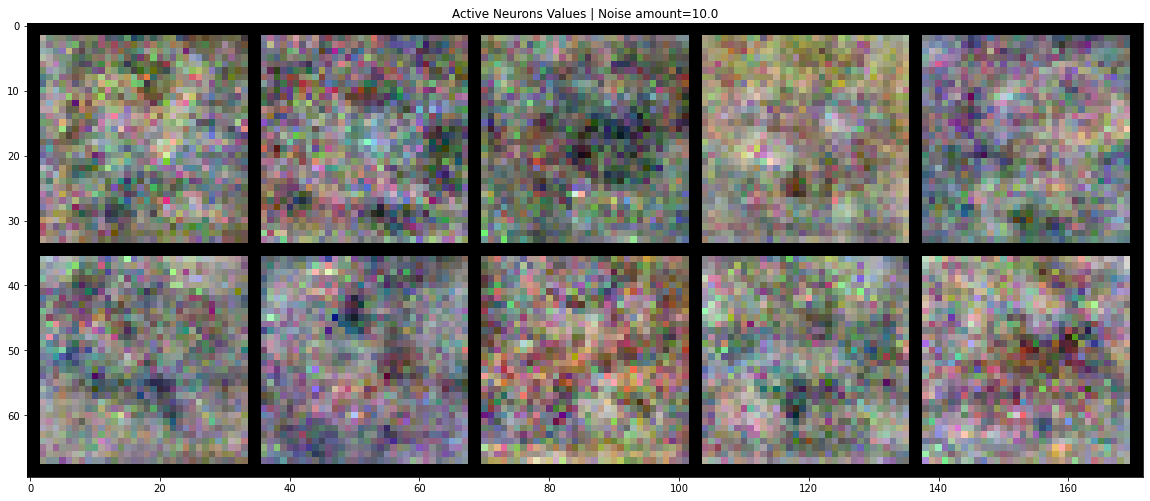

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


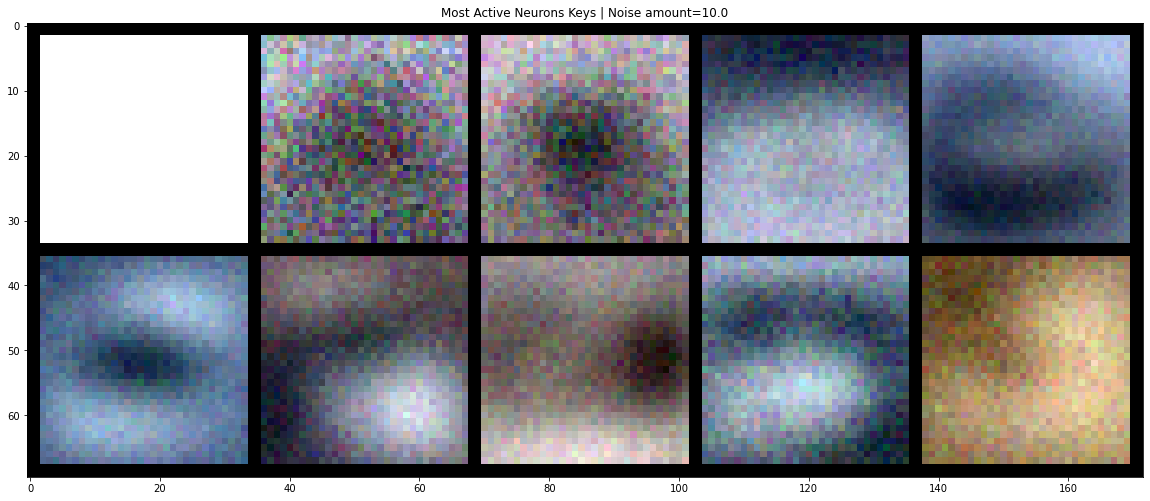

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


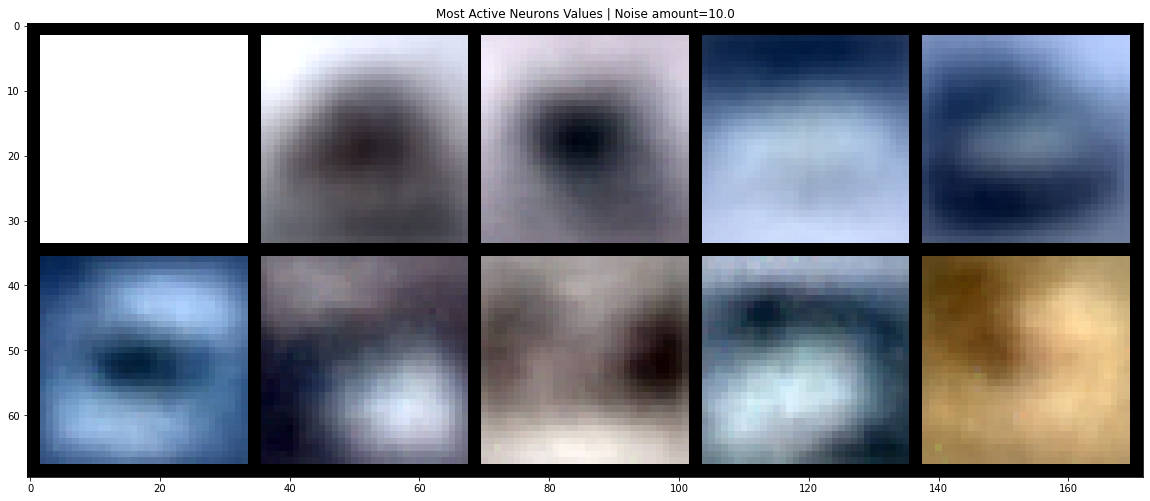

Mean cosine similarity tensor(0.0110)
Activity weighted mean cosine similarity tensor(0.0753)


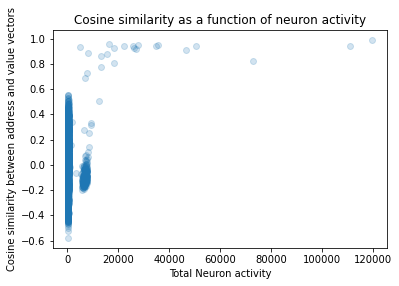

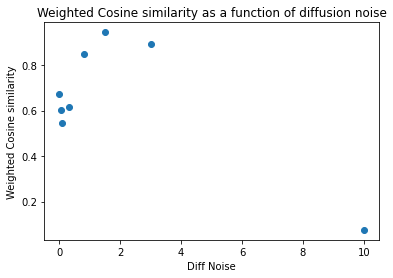

In [16]:

#run = 0.3
bs = 20

#LowerLR
model_template = "Interpretable_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1"
#"_ffnCIFAR10_w_Projections_Adam_lr0.0001_datas=None_10000Neurons_projM=True_nlayers1"
#"_ffnRaw_CIFAR10_Adam_lr0.0001_datas=None_10000Neurons_projM=False_nlayers1" #"_ffnRaw_CIFAR10_Adam_lr1e-05_datas=None_10000Neurons_projM=False_nlayers1"#"_ffnBaseline_Adam_lr0.0001_datas=None_1steps_10000Neurons_projM=False_nlayers1"

use_CIFAR10 = True 

model_prefixes = [0.0,0.05,0.1,0.3,0.8,1.5, 3.0, 10.0]#["100N","1_000N","10_000N","100_000N"]

dataset_path="../data/"
save_dir = "../../scratch_link/Foundational-SDM/data/CachedLatents/"
extra = {"use_wandb":False}

if "CIFAR10" in model_template or use_CIFAR10: 
    latent, labels = torch.load('../data/CIFAR10/all_data_train.pt')
    latent = latent.flatten(start_dim=1 )
    if latent.dtype is torch.uint8:#"/ImageNet32/" in self.dataset_path or "/CIFAR10/" in self.dataset_path:
            latent = latent.type(torch.float)/255
else: 

    latent, labels = torch.load('../data/CachedOutputs/ConvMixerWTransforms_ImgNet32_CIFAR10/all_data_train.pt')

weighted_cosine_sims =[]
for run_ind, run in enumerate(model_prefixes): 
    print("Noise amount:", run)

    model, params = load_model(f"{run}{model_template}", dataset_path, save_dir, device, extra_extras=extra)

    if run_ind ==0:
        print(model)

    #######

    rand_inds = np.random.choice(len(latent), bs)
    x_noise, x = model.return_noise_and_final_outputs(latent[rand_inds].to(device))

    gridshow( latent[rand_inds].view(bs, 3,32,32), title=f"Original images" )
    if params.use_projection_matrix and params.project_before_noise:
        gridshow( model.net[0](latent[rand_inds].to(device)).view(bs, 3,32,32), title=f"Projected Image | Noise amount={run}" )
        gridshow( min_max_scale(model.net[0](latent[rand_inds].to(device))).view(bs, 3,32,32), title=f"Min Max Scale, Projected Image | Noise amount={run}" )
    gridshow( x_noise.view(bs, 3,32,32), title=f"Noisy images | Noise amount={run}" )
    
    if params.classification: 
        preds = torch.argmax(x,dim=1)
        print("Predictions", preds)
    else: 
        gridshow( x.view(bs, 3,32,32), title=f"Reconstruction | Noise amount={run}" )

    #######

    rand_inds = np.random.choice(params.nneurons[0], bs)
    ws = model.X_a.weight.detach()[rand_inds]
    ws = min_max_scale(ws)

    gridshow( ws.view(bs, 3,32,32), title=f"Random Neurons Keys | Noise amount={run}" )

    if not params.classification: 
        ws = model.X_v().detach()[rand_inds]
        ws = min_max_scale(ws)
        gridshow( ws.view(bs, 3,32,32), title=f"Random Neurons Values | Noise amount={run}" )

    print("=============")

    # find the most active neurons

    num_lats = 5000 if not use_gpu else len(latent)

    neuron_active_summer = get_active_neurons(model, latent[:num_lats], device, params.nneurons[0])

    active_mask = neuron_active_summer>0.0001

    print("Fraction of alive neurons", active_mask.type(torch.float).mean())

    ws = model.X_a.weight.detach()[active_mask]
    rand_inds = np.random.choice(len(ws), bs)
    ws = min_max_scale(ws[rand_inds])
    gridshow( ws.view(bs, 3,32,32), title=f"Active Neurons Keys | Noise amount={run}" )

    if not params.classification: 
        ws = model.X_v().detach()[active_mask]
        ws = min_max_scale(ws[rand_inds])
        gridshow( ws.view(bs, 3,32,32), title=f"Active Neurons Values | Noise amount={run}" )

    print("=============")

    ### Most active neurons

    vals, inds = torch.topk(neuron_active_summer, bs)

    ws = model.X_a.weight.detach()[inds]
    ws = min_max_scale(ws)
    gridshow( ws.view(bs, 3,32,32), title=f"Most Active Neurons Keys | Noise amount={run}" )

    if not params.classification: 
        ws = model.X_v().detach()[inds]
        ws = min_max_scale(ws)
        gridshow( ws.view(bs, 3,32,32), title=f"Most Active Neurons Values | Noise amount={run}" )

    ### Cosine similarity

    cosim = cosine_sim(model.X_a.weight.detach(), model.X_v().detach())
    print("Mean cosine similarity", cosim.mean())
    act_weighted_cos_sim=(cosim*(neuron_active_summer/neuron_active_summer.sum())).sum()
    print("Activity weighted mean cosine similarity", act_weighted_cos_sim)
    weighted_cosine_sims.append( act_weighted_cos_sim )
    plt.scatter(neuron_active_summer, cosim, alpha=0.2)
    plt.xlabel("Total Neuron activity")
    plt.ylabel("Cosine similarity between address and value vectors")

    plt.title("Cosine similarity as a function of neuron activity")
    plt.show()

# for each neuron find the pattern that it most closely resembles. 


plt.scatter(model_prefixes, weighted_cosine_sims)
plt.xlabel("Diff Noise")
plt.ylabel("Weighted Cosine similarity")

plt.title("Weighted Cosine similarity as a function of diffusion noise")
plt.show()



In [19]:
(neuron_active_summer>0.0).sum()

tensor(10000)

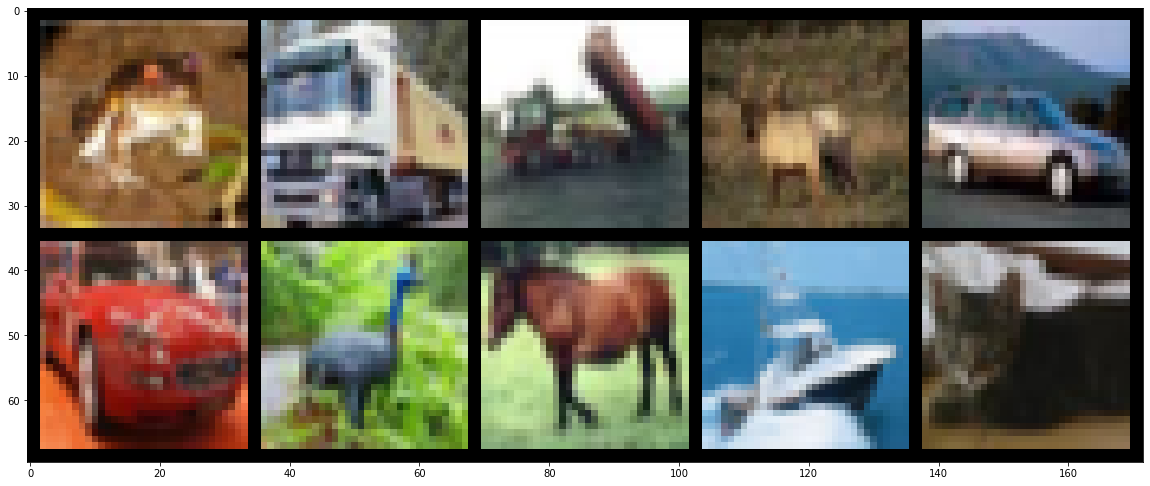

In [4]:

bs = 10
gridshow( latent[:bs].view(bs, 3,32,32) )
plt.show()

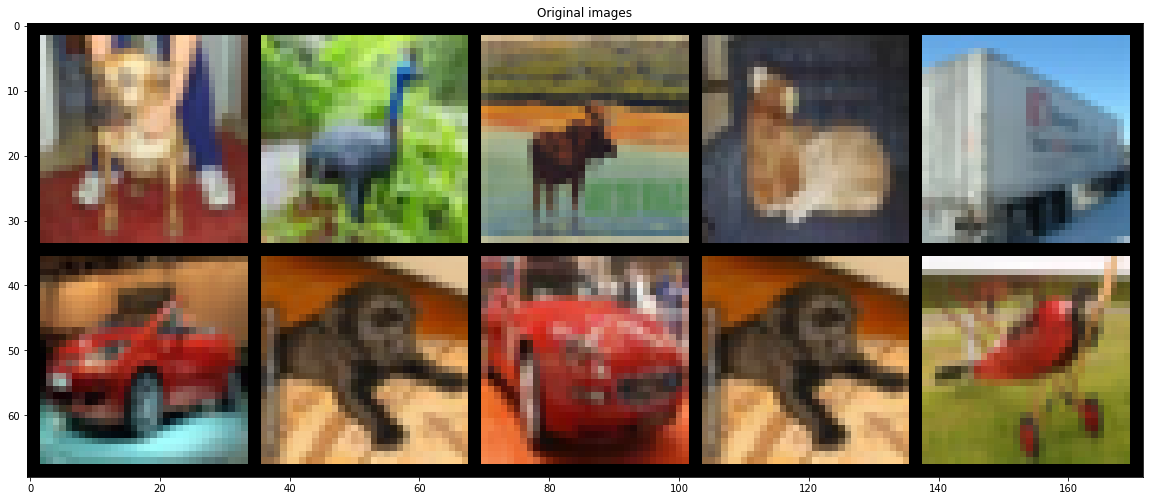

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


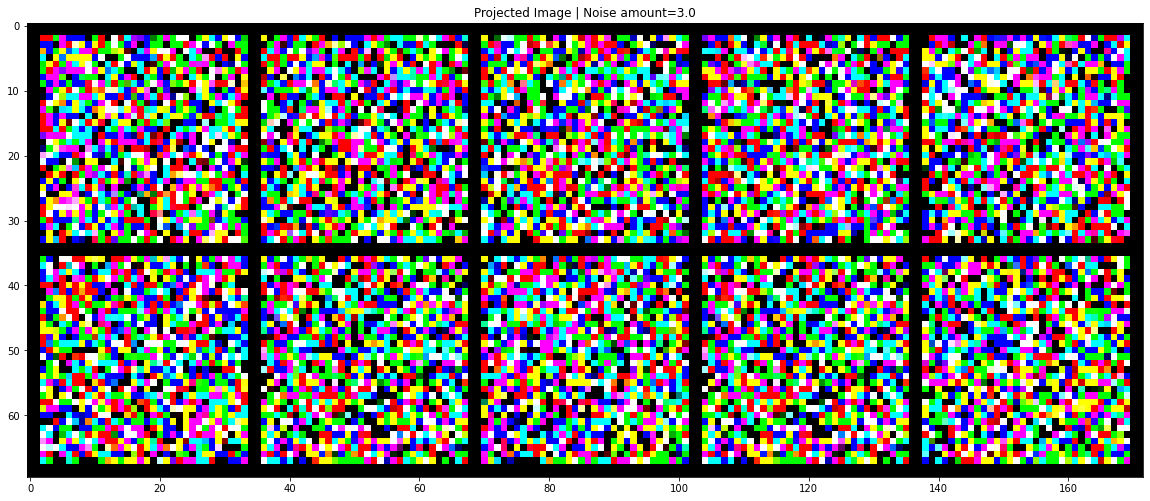

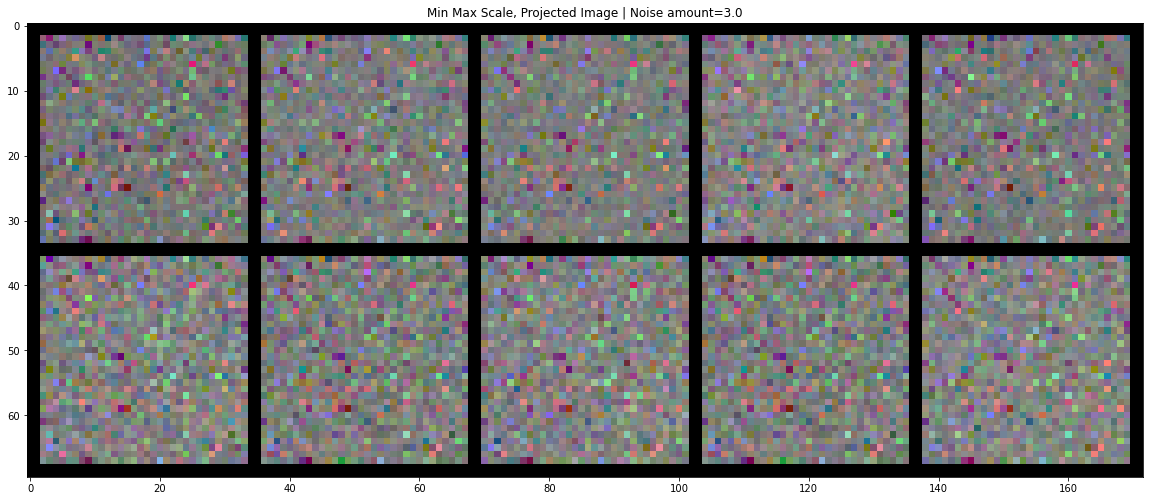

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


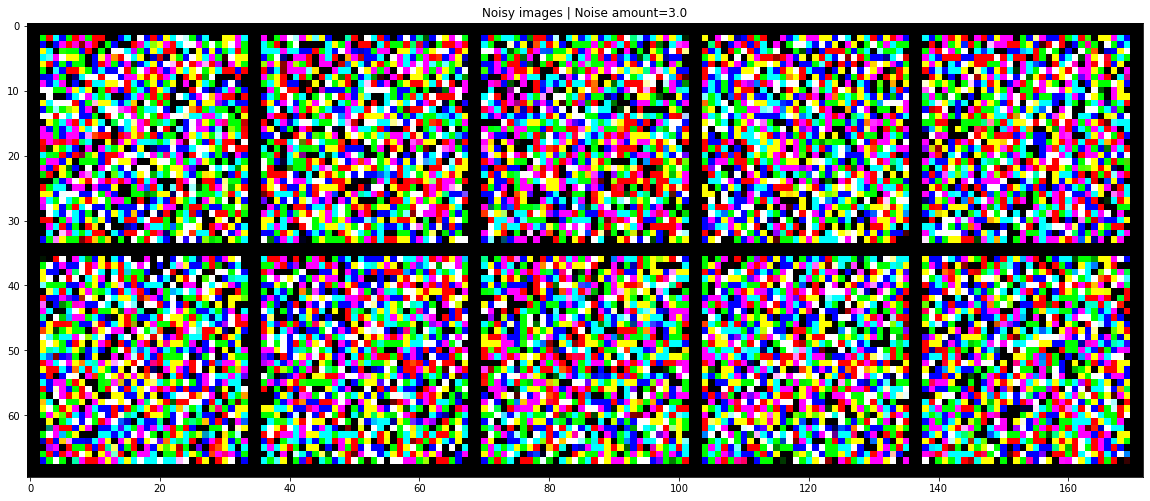

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[ 15.3862,   0.7540,   4.4249,  ...,  14.7555,  14.9547,  -6.2937],
        [ -1.0269,  -5.7831,   0.5811,  ..., -11.3078, -10.2462,  -2.4700],
        [ 13.1139, -18.4721,  -3.5599,  ...,  13.4359,  25.7249,  12.7675],
        ...,
        [ 11.0245,  -7.6645,  -7.0466,  ...,  10.0591,  -2.5050,   6.7592],
        [  7.8574, -11.5809,   7.2418,  ...,  11.1642,   2.9291,   5.1925],
        [  9.8951,   0.1974, -12.9932,  ...,   7.9702,   6.1908,  -3.7376]],
       grad_fn=<SubBackward0>)


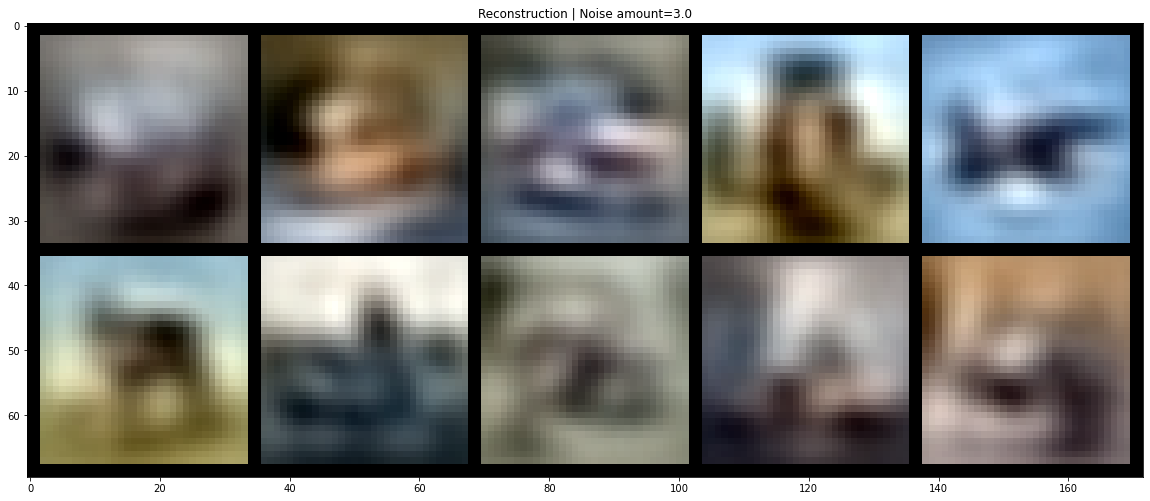

In [7]:
gridshow( latent[rand_inds].view(bs, 3,32,32), title=f"Original images" )
if params.use_projection_matrix and params.project_before_noise:
    ml = model.net[0](latent[rand_inds].to(device))
    gridshow( ml.view(bs, 3,32,32), title=f"Projected Image | Noise amount={run}" )
    gridshow( min_max_scale(ml).view(bs, 3,32,32), title=f"Min Max Scale, Projected Image | Noise amount={run}" )
gridshow( x_noise.view(bs, 3,32,32), title=f"Noisy images | Noise amount={run}" )

print( ml - x_noise)
gridshow( x.view(bs, 3,32,32), title=f"Reconstruction | Noise amount={run}" )

tensor([[ 15.3862,   0.7540,   4.4249,  ...,  14.7555,  14.9547,  -6.2937],
        [ -1.0269,  -5.7831,   0.5811,  ..., -11.3078, -10.2462,  -2.4700],
        [ 13.1139, -18.4721,  -3.5599,  ...,  13.4359,  25.7249,  12.7675],
        ...,
        [ 11.0245,  -7.6645,  -7.0466,  ...,  10.0591,  -2.5050,   6.7592],
        [  7.8574, -11.5809,   7.2418,  ...,  11.1642,   2.9291,   5.1925],
        [  9.8951,   0.1974, -12.9932,  ...,   7.9702,   6.1908,  -3.7376]],
       grad_fn=<SubBackward0>)